# <center><font color='#708090'>Project 05: Exploring And Communicating Data Findings From Prosper Loan Data.</center><br>


## Table of Contents
- [Introduction](#intro)
- [Getting The Data](#getting)
- [Preliminary Wrangling](#wrangling)
- [Visualization](#visualization)
    - [Univariate Exploration](#univariate)
    - [Bivariate Exploration](#bivariate)
    - [Multivariate Exploration](#multivariate)
- [Resources](#resources)

<a id='intro'></a>
# <font color='#6495ED'> Introduction
In this project we are going to investigate loan data from *Prosper*.

- **What is prosper?**<br>*Prosper* is a San Francisco, California-based company in the peer-to-peer lending industry with over 7 billion dollars in funded loans. In *Prosper* individuals can either invest in personal loans or request to borrow money. Borrowers request personal loans on Prosper and investors (individual or institutional) can fund anywhere from 2,000 to 40,000 dollars per loan request. Investors can consider borrowers’ credit scores, ratings, and histories and the category of the loan.

    
- **What questions are we going to investigate?**<br>The main question we are going to investigate is *what factors affects a loan outcome status*. 


- **What are the main features of interest?**<br> features of interest include: loan amount, interest rate, APR, employment status, verifiable income, term, recommendations, listing category, and prosper rating.

<a id='rating'></a>    
- **What is prosper rating?**<br>Prosper provides a proprietary "Prosper Rating" for prospective borrowers based on the company's estimation of that borrower's "estimated loss rate." According to the company, that figure is "determined by two scores: (1) the credit score, obtained from an official credit reporting agency, and (2) the Prosper Score, figured in-house based on the Prosper population." <br>Prosper Ratings, from lowest-risk to highest-risk, are labeled: AA, A, B, C, D, E, and HR ("High Risk").

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

<a id='getting'></a>
# <font color='#6495ED'> Getting The Data

In [2]:
loan_data = pd.read_csv('prosper_loan_data.csv')

In [3]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
for i,v in enumerate(loan_data):
    print(i,v)

0 ListingKey
1 ListingNumber
2 ListingCreationDate
3 CreditGrade
4 Term
5 LoanStatus
6 ClosedDate
7 BorrowerAPR
8 BorrowerRate
9 LenderYield
10 EstimatedEffectiveYield
11 EstimatedLoss
12 EstimatedReturn
13 ProsperRating (numeric)
14 ProsperRating (Alpha)
15 ProsperScore
16 ListingCategory (numeric)
17 BorrowerState
18 Occupation
19 EmploymentStatus
20 EmploymentStatusDuration
21 IsBorrowerHomeowner
22 CurrentlyInGroup
23 GroupKey
24 DateCreditPulled
25 CreditScoreRangeLower
26 CreditScoreRangeUpper
27 FirstRecordedCreditLine
28 CurrentCreditLines
29 OpenCreditLines
30 TotalCreditLinespast7years
31 OpenRevolvingAccounts
32 OpenRevolvingMonthlyPayment
33 InquiriesLast6Months
34 TotalInquiries
35 CurrentDelinquencies
36 AmountDelinquent
37 DelinquenciesLast7Years
38 PublicRecordsLast10Years
39 PublicRecordsLast12Months
40 RevolvingCreditBalance
41 BankcardUtilization
42 AvailableBankcardCredit
43 TotalTrades
44 TradesNeverDelinquent (percentage)
45 TradesOpenedLast6Months
46 DebtToIncome

### Creating a new data frame containing only variable of interest
- **Features of interest:**


1. `ListingCreationDate` : The date the listing was created.
2. `Term` : The length of the loan expressed in months.
3. `LoanStatus` : The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
4. `BorrowerAPR` : The Borrower's Annual Percentage Rate (APR) for the loan.
5. `BorrowerRate` : The Borrower's interest rate for this loan. 
6. `ProsperRating` : The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.
7. `ListingCategory` : The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
8. `EmploymentStatus` : The employment status of the borrower at the time they posted the listing.
9. `EmploymentStatusDuration` : The length in months of the employment status at the time the listing was created.
10. `IsBorrowerHomeowner` : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
11. `IncomeVerifiable` : The borrower indicated they have the required documentation to support their income.
12. `Recommendations` : Number of recommendations the borrower had at the time the listing was created.
13. `LoanOriginalAmount` : The origination amount of the loan.
14. `MonthlyLoanPayment` : The scheduled monthly loan payment.

In [5]:
# creating a new dataframe with only columns of interest
loans = loan_data[[
         'ListingCreationDate',
         'ListingCategory (numeric)',
         'LoanOriginalAmount',
         'MonthlyLoanPayment',
         'BorrowerAPR',
         'BorrowerRate',
         'EmploymentStatus',
         'EmploymentStatusDuration',
         'IncomeVerifiable',
         'IsBorrowerHomeowner',
         'Recommendations',
         'Term',
         'ProsperRating (Alpha)',
         'LoanStatus'
        ]]

<a id='wrangling'></a>
# <font color='#6495ED'>Preliminary Wrangling

In [6]:
print(loans.shape)
loans.head()

(113937, 14)


,ListingCreationDate,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IncomeVerifiable,IsBorrowerHomeowner,Recommendations,Term,ProsperRating (Alpha),LoanStatus
0,2007-08-26 19:09:29.263000000,0,9425,330.43,0.16516,0.1580,Self-employed,2.0,True,True,0,36,NaN,Completed
1,2014-02-27 08:28:07.900000000,2,10000,318.93,0.12016,0.0920,Employed,44.0,True,False,0,36,A,Current
2,2007-01-05 15:00:47.090000000,0,3001,123.32,0.28269,0.2750,Not available,NaN,True,False,0,36,NaN,Completed
3,2012-10-22 11:02:35.010000000,16,10000,321.45,0.12528,0.0974,Employed,113.0,True,True,0,36,A,Current
4,2013-09-14 18:38:39.097000000,2,15000,563.97,0.24614,0.2085,Employed,44.0,True,True,0,36,D,Current


In [7]:
loans.describe()

,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,EmploymentStatusDuration,Recommendations,Term
count,113937.000000,113937.00000,113937.000000,113912.000000,113937.000000,106312.000000,113937.000000,113937.000000
mean,2.774209,8337.01385,272.475783,0.218828,0.192764,96.071582,0.048027,40.830248
std,3.996797,6245.80058,192.697812,0.080364,0.074818,94.480605,0.332353,10.436212
min,0.000000,1000.00000,0.000000,0.006530,0.000000,0.000000,0.000000,12.000000
25%,1.000000,4000.00000,131.620000,0.156290,0.134000,26.000000,0.000000,36.000000
50%,1.000000,6500.00000,217.740000,0.209760,0.184000,67.000000,0.000000,36.000000
75%,3.000000,12000.00000,371.580000,0.283810,0.250000,137.000000,0.000000,36.000000
max,20.000000,35000.00000,2251.510000,0.512290,0.497500,755.000000,39.000000,60.000000


In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   ListingCategory (numeric)  113937 non-null  int64  
 2   LoanOriginalAmount         113937 non-null  int64  
 3   MonthlyLoanPayment         113937 non-null  float64
 4   BorrowerAPR                113912 non-null  float64
 5   BorrowerRate               113937 non-null  float64
 6   EmploymentStatus           111682 non-null  object 
 7   EmploymentStatusDuration   106312 non-null  float64
 8   IncomeVerifiable           113937 non-null  bool   
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  Recommendations            113937 non-null  int64  
 11  Term                       113937 non-null  int64  
 12  ProsperRating (Alpha)      84853 non-null   object 
 13  LoanStatus                 11

In [9]:
# checking for duplicates
loans.duplicated().sum()

871

In [10]:
# sample duplicate
loans.query('ListingCreationDate == "2013-12-02 10:43:39.117000000" ')

,ListingCreationDate,ListingCategory (numeric),LoanOriginalAmount,MonthlyLoanPayment,BorrowerAPR,BorrowerRate,EmploymentStatus,EmploymentStatusDuration,IncomeVerifiable,IsBorrowerHomeowner,Recommendations,Term,ProsperRating (Alpha),LoanStatus
8,2013-12-02 10:43:39.117000000,7,10000,305.54,0.0762,0.0629,Employed,269.0,True,True,0,36,AA,Current
9,2013-12-02 10:43:39.117000000,7,10000,305.54,0.0762,0.0629,Employed,269.0,True,True,0,36,AA,Current


In [11]:
# dealing with duplicates
loans = loans.drop_duplicates()
loans.duplicated().sum()

0

In [12]:
# dealing with missing values
loans = loans.dropna(axis='rows',how='any',subset=['BorrowerAPR','EmploymentStatus','EmploymentStatusDuration'])

In [13]:
# changing column names
loans = loans.rename(columns={
    'ListingCreationDate':'listing_creation_date',
    'Term':'term',
    'LoanStatus':'loan_status',
    'BorrowerAPR':'borrower_apr',
    'BorrowerRate':'borrower_rate',
    'MonthlyLoanPayment':'monthly_loan_payment',
    'ProsperRating (Alpha)':'prosper_rating',
    'ListingCategory (numeric)':'listing_category',
    'EmploymentStatus':'employment_status',
    'EmploymentStatusDuration':'employment_status_duration',
    'IsBorrowerHomeowner':'is_borrower_homeowner',
    'IncomeVerifiable':'income_verifiable',
    'Recommendations':'recommendations',
    'LoanOriginalAmount':'loan_original_amount'
})

In [14]:
# convert listing_creation_date to datetime
loans['listing_creation_date'] = pd.to_datetime(loans['listing_creation_date'])

In [15]:
# replace each number in listing_category with its categorical representation
replaced_value = {0:'Not Available',
                  1:'Debt Consolidation',
                  2:'Home Improvement',
                  3:'Business',
                  4:'Personal Loan',
                  5:'Student Use',
                  6:'Auto',
                  7:'Other',
                  8:'Baby and Adoption',
                  9:'Boat',
                  10:'Cosmetic Procedure',
                  11:'Engagement Ring',
                  12:'Green Loans',
                  13:'Household Expenses',
                  14:'Large Purchases',
                  15:'Medical/Dental',
                  16:'Motorcycle',
                  17:'RV',
                  18:'Taxes',
                  19:'Vacation',
                  20:'Wedding Loans'
                 } 
loans = loans.replace({"listing_category":replaced_value}) 

In [16]:
print(loans.listing_category.value_counts())

Debt Consolidation    57609
Other                 10445
Not Available          9363
Home Improvement       7387
Business               7155
Auto                   2568
Personal Loan          2395
Household Expenses     1986
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           761
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby and Adoption       196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: listing_category, dtype: int64


In [17]:
# replace all various past due values in loan_status with just past due
loans['loan_status'] = loans['loan_status'].str.replace(r'Past\WDue.*','Past Due')
loans.loan_status.value_counts()

Current                   55720
Completed                 33535
Chargedoff                10634
Defaulted                  3291
Past Due                   2057
FinalPaymentInProgress      203
Cancelled                     1
Name: loan_status, dtype: int64

In [18]:
loans.to_csv('prosper_loan_sub.csv',index=False)

In [19]:
loan_df = pd.read_csv('prosper_loan_sub.csv',parse_dates=['listing_creation_date'])

In [20]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105441 entries, 0 to 105440
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   listing_creation_date       105441 non-null  datetime64[ns]
 1   listing_category            105441 non-null  object        
 2   loan_original_amount        105441 non-null  int64         
 3   monthly_loan_payment        105441 non-null  float64       
 4   borrower_apr                105441 non-null  float64       
 5   borrower_rate               105441 non-null  float64       
 6   employment_status           105441 non-null  object        
 7   employment_status_duration  105441 non-null  float64       
 8   income_verifiable           105441 non-null  bool          
 9   is_borrower_homeowner       105441 non-null  bool          
 10  recommendations             105441 non-null  int64         
 11  term                        105441 non-

## Variables sorted by type:
- **object type**:
  - nominal:
      - listing_category
      - loan_status
      - employment_status
  - ordinal:
      - prosper_rating


- **datetime type**:
  - listing_creation_date


- **bool type**:
  - is_borrower_homeowner
  - income_verifiable


- **int type**:
  - term
  - recommendations
  - loan_original_amount


- **float type**:
  - borrower_apr
  - borrower_rate
  - monthly_loan_payment
  - employment_status_duration

<a id='visualization'></a>
# <font color='#6495ED'>Visualization
    

Here we will explore each feature/variable one at time with univariate visualizations, find relationship between any two features with bivariate visualizations, and look for even more relationships between various features with multivariate visualizations.


<a id='univariate'></a>
## <font color='#6495ED'>Univariate Exploration

    
Let's start by looking at our variables of interest one by one.


### Exploring qualitative variables:

    
We will begin by exploring categorical variables. We have four categorical variables, one of them is ordinal.<br> Before anything let's first:
- View the unique values in each variable.
- Convert categorical variables to categorical types​.

In [21]:
# unique values in each object type column
print('ListingCategory',loan_df.listing_category.unique(),'\n')
print('LoanStatus',loan_df.loan_status.unique(),'\n')
print('EmploymentStatus',loan_df.employment_status.unique(),'\n')
print('ProsperRating',loan_df.prosper_rating.unique())

ListingCategory ['Not Available' 'Home Improvement' 'Motorcycle' 'Debt Consolidation'
 'Other' 'Household Expenses' 'Auto' 'Medical/Dental' 'Wedding Loans'
 'Vacation' 'Business' 'Taxes' 'Baby and Adoption' 'Personal Loan'
 'Engagement Ring' 'Large Purchases' 'Student Use' 'Boat' 'RV'
 'Cosmetic Procedure' 'Green Loans'] 

LoanStatus ['Completed' 'Current' 'Past Due' 'Defaulted' 'Chargedoff'
 'FinalPaymentInProgress' 'Cancelled'] 

EmploymentStatus ['Self-employed' 'Employed' 'Full-time' 'Other' 'Not employed' 'Part-time'
 'Retired'] 

ProsperRating [nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']


In [22]:
# count of each unique value
print('ListingCategory','\n',loan_df.listing_category.value_counts(),'\n')
print('LoanStatus','\n',loan_df.loan_status.value_counts(),'\n')
print('EmploymentStatus','\n',loan_df.employment_status.value_counts(),'\n')
print('ProsperRating','\n',loan_df.prosper_rating.value_counts())

ListingCategory 
 Debt Consolidation    57609
Other                 10445
Not Available          9363
Home Improvement       7387
Business               7155
Auto                   2568
Personal Loan          2395
Household Expenses     1986
Medical/Dental         1507
Taxes                   882
Large Purchases         863
Vacation                764
Wedding Loans           761
Student Use             756
Motorcycle              304
Engagement Ring         214
Baby and Adoption       196
Cosmetic Procedure       91
Boat                     85
Green Loans              58
RV                       52
Name: listing_category, dtype: int64 

LoanStatus 
 Current                   55720
Completed                 33535
Chargedoff                10634
Defaulted                  3291
Past Due                   2057
FinalPaymentInProgress      203
Cancelled                     1
Name: loan_status, dtype: int64 

EmploymentStatus 
 Employed         66597
Full-time        26341
Self-employed     6

- **Notes about some categorical columns**<br> 


  1. `loan_status` : We will concentrate our explorations of Loan status on final outcomes, so 'current' status will not be included in our analysis as it is of not much help and will only cause distraction. Also, some outcomes such as FinalPaymentInProgress and Cancelled have not enough data to be meaningful so they will be excluded also.
  
  
  2. `listing_category` : Due to the quite large number of categories and with very little representing data of the majority of them, we will choose categories that have enough data to be meaningful.
  
  
  3. `employment_status` : The 'other' status does not convey much meaning, so it will be excluded. We expect the employment status to be employed or not employed or if you are your own boss, self-employed, and all are included.

In [23]:
# converting categorical variables to categorical types
cat_var_dict = {'loan_status': ['Completed','Past Due','Defaulted','Chargedoff'],
                'prosper_rating': ['AA','A','B','C','D','E','HR'],
                'employment_status':['Self-employed','Employed','Full-time','Part-time','Not employed','Retired'],
                'listing_category': ['Debt Consolidation','Home Improvement','Business','Auto','Personal Loan','Household Expenses','Medical/Dental']
               }

for v in cat_var_dict:
    cat_var = pd.api.types.CategoricalDtype(ordered = True, categories = cat_var_dict[v])
    loan_df[v] = loan_df[v].astype(cat_var)

loan_df.dtypes

listing_creation_date         datetime64[ns]
listing_category                    category
loan_original_amount                   int64
monthly_loan_payment                 float64
borrower_apr                         float64
borrower_rate                        float64
employment_status                   category
employment_status_duration           float64
income_verifiable                       bool
is_borrower_homeowner                   bool
recommendations                        int64
term                                   int64
prosper_rating                      category
loan_status                         category
dtype: object

Now we are ready to start our visualizations, beginning with our main feature of interest, loan status.

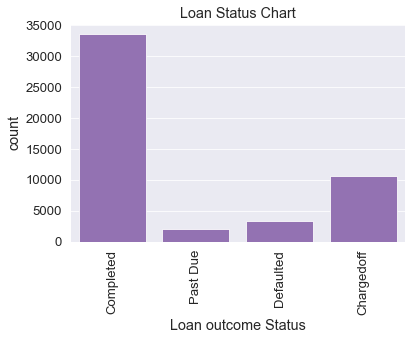

In [24]:
# plotting a bar chart for loan_status
color = sns.color_palette()[4]
sns.countplot(data=loan_df, x='loan_status',color=color)
plt.xticks(rotation=90)
plt.title('Loan Status Chart')
plt.xlabel('Loan outcome Status');

**What is the most frequent loan outcome?**<br>
From the chart above, we can see that in overall, completed loans is the most frequent outcome, more frequent than Past Due, Defaulted, and Chargedoff combined together.

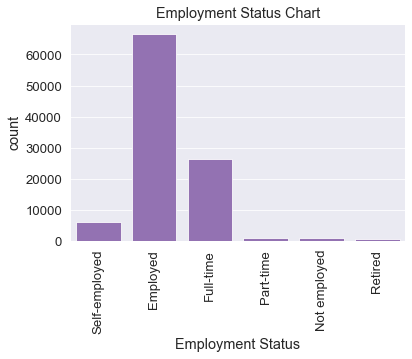

In [25]:
# plotting a bar chart for employment_status
color = sns.color_palette()[4]
sns.countplot(data=loan_df, x='employment_status',color=color)
plt.xticks(rotation=90)
plt.title('Employment Status Chart')
plt.xlabel('Employment Status');

**Are the majority of borrowers not employed?**<br>
Clearly as we can see, it is not the case. almost all borrowers are employed and the number of unemployed borrowers is unnoticeable.

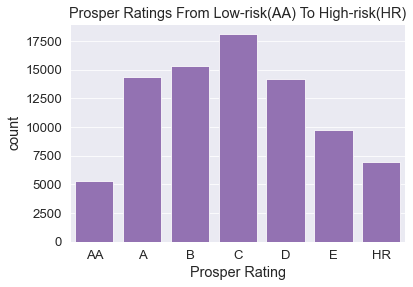

In [26]:
# plotting a bar chart for prosper_rating
color = sns.color_palette()[4]
rating_order = ['AA','A','B','C','D','E','HR']
sns.countplot(data=loan_df, x='prosper_rating',color=color, order=rating_order)
plt.title('Prosper Ratings From Low-risk(AA) To High-risk(HR)')
plt.xlabel('Prosper Rating');

**What is the most common prosper rating?**<br>
The most common prosper rating is C. Which we can describe as neutral-risk being in the middle between AA or low-risk and HR or high-risk. For more details about how ratings are determined, check [prosper rating](#rating). 

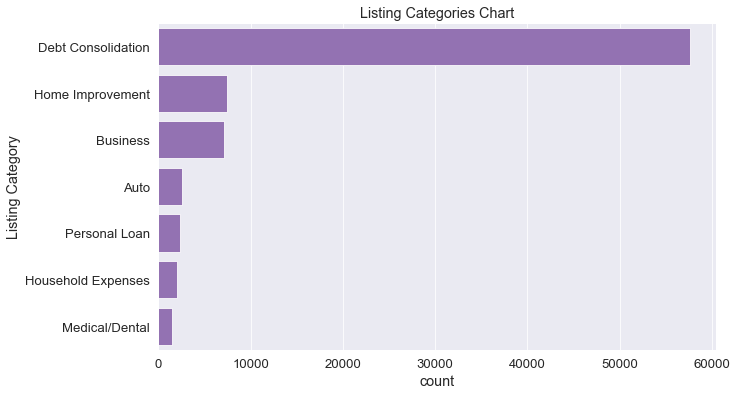

In [27]:
# plotting a bar chart for listing_category
plt.figure(figsize=(10,6))
color = sns.color_palette()[4]
sns.countplot(data=loan_df, y='listing_category',color=color)
plt.title('Listing Categories Chart')
plt.ylabel('Listing Category');

**Which listing category is most chosen by borrowers?**<br>The listing category most selected by borrowers is the Debt Consolidation category, almost the majority of loan cases fall in this category. This is followed by Home Improvement and Business, respectively.

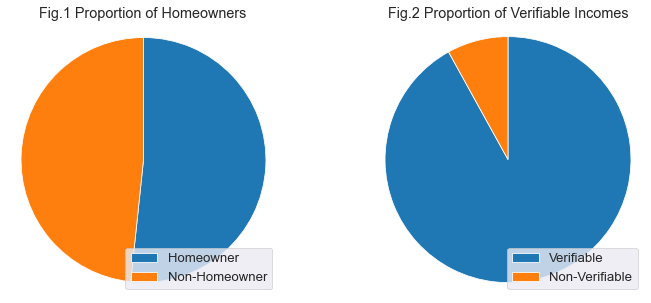

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sorted_counts = loan_df.is_borrower_homeowner.value_counts()
labels = ['Homeowner','Non-Homeowner']
plt.pie(sorted_counts,startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Fig.1 Proportion of Homeowners')
plt.legend(labels,loc='lower right')

plt.subplot(1,2,2)
sorted_counts = loan_df.income_verifiable.value_counts()
labels = ['Verifiable','Non-Verifiable']
plt.pie(sorted_counts,startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Fig.2 Proportion of Verifiable Incomes')
plt.legend(labels,loc='lower right');

**Are most borrowers Homeowners?**<br>As we see in Fig.1, most borrowers are homeowners, but the difference in the proportion between homeowners and non-homeowners is quite small and almost equal. We are going to explore the effect of the borrower being a homeowner on the loan outcome more deeper later below.


**Do all borrowers have a verifiable income?**<br>Almost yes. As seen in Fig.2, the majority of borrowers have a verifiable income. The very small proportion with non-verifiable income are probably the unemployed borrowers. This is consistant with what we've found out from exploring employment status of borrowers. Also, this means that employment status and verifiable income will not be of much importance to us as factor in determining the loan outcome status as the great majority of borrowers in the data are employed with verifiable income, so no meaninful comparison can be made.

### Exploring quantitative variables:


Now let's start having a look at the various numerical variables we have.

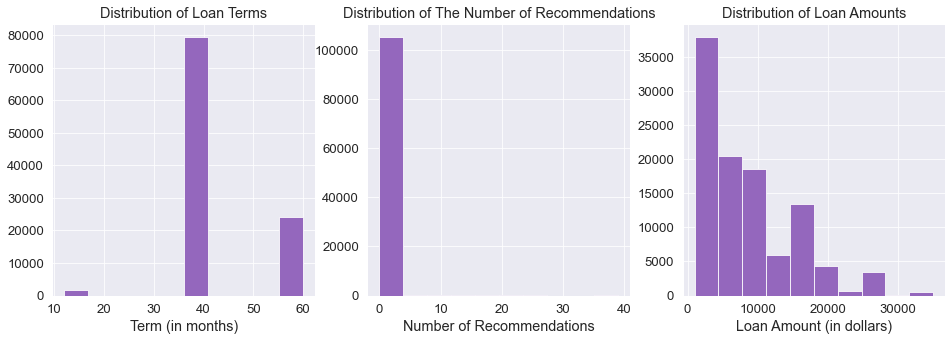

In [29]:
plt.figure(figsize=(16,5))
color=sns.color_palette()[4]

plt.subplot(1,3,1)
plt.hist(data=loan_df, x="term",color=color)
plt.title('Distribution of Loan Terms')
plt.xlabel('Term (in months)')

plt.subplot(1,3,2)
plt.hist(data=loan_df, x="recommendations",color=color)
plt.title('Distribution of The Number of Recommendations')
plt.xlabel('Number of Recommendations')

plt.subplot(1,3,3)
plt.hist(data=loan_df, x="loan_original_amount",color=color)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in dollars)');

- The loan terms are discrete with separate a few values which will be better visualized using a bar chart instead of a histogram. Not much variation in here.


- The number of recommendation is very highly skewed to right due to big majority of borrowers having no recommendations at all. we will explore it furthur after performing a log transform.


- The distribution of the original loan amount is bimodal right-skewed, with most loan amounts below 10000 dollars.

Let's now create a more clear and easy to understand chart for loan terms and then we will have another look at number of recommendations and original loan amounts for more details.

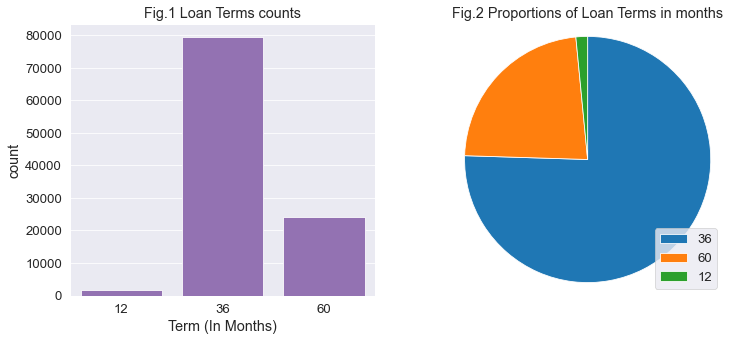

In [30]:
# creating a bar and pie chart for loan terms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=loan_df, x='term',color=color)
plt.title('Fig.1 Loan Terms counts')
plt.xlabel('Term (In Months)')

plt.subplot(1,2,2)
sorted_counts = loan_df.term.value_counts()
labels = loan_df.term.value_counts().index
plt.pie(sorted_counts,startangle = 90, counterclock = False)
plt.axis('square')
plt.title('Fig.2 Proportions of Loan Terms in months')
plt.legend(labels,loc='lower right');

This is much better this way. Using bar chart for visualizing the count and a pie chart for proportions of loan terms makes understanding the feature much more easier than the histogram. This feature could even be considered a categorical variable for 1 year, 3 years, and 5 years.


**Which is the most frequent loan term?**<br>The most frequent loan term chosen by borrowers is 36 months (3 years) which is clearly seen in the bar and pie chart. 60 months (5 years) term is the second more common and a term of 12 months (1 year) is chosen by a very few proportion of borrowers.

**Back to number of recommendations and original loan amount**<br>we will have a closer look at both them now by plotting a histogram with a larger bin number.

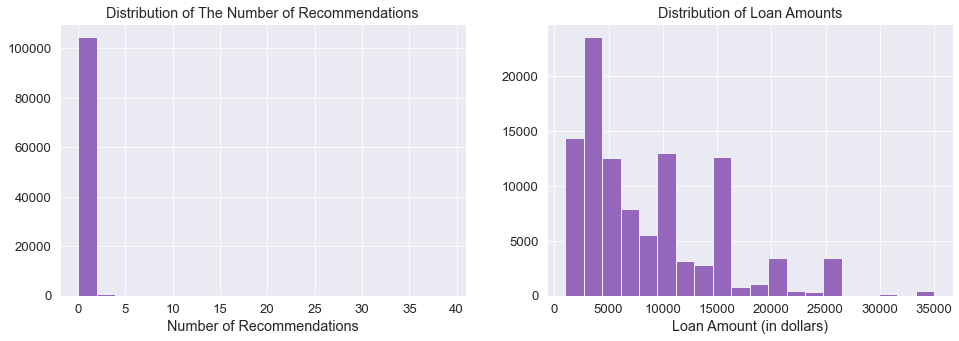

In [31]:

plt.figure(figsize=(16,5))
color=sns.color_palette()[4]

plt.subplot(1,2,1)
plt.hist(data=loan_df, x="recommendations",color=color,bins=20)
plt.title('Distribution of The Number of Recommendations')
plt.xlabel('Number of Recommendations')

plt.subplot(1,2,2)
plt.hist(data=loan_df, x="loan_original_amount",color=color,bins=20)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in dollars)');

- Distribution of the number of recommendations isn't affected much, still highly skewed with almost all points falling in the far left corner due to majority of borrowers with no recommendations. we will investigate it furthur with a log transform.


- The distribution of loan original amount is still right-skewed but we can see now it is multimodal. Most loan amounts fall below 10000. From the histogram above we can see that the number of loans higher than 5000 tend to decrease until it we reach about 10000 we have a spike then the number of loans continue decreasing until another spike at 15000. Number of loans generally tend to decrease as the amount increase, with a prominent spike at each 5 step interval. as seen below.

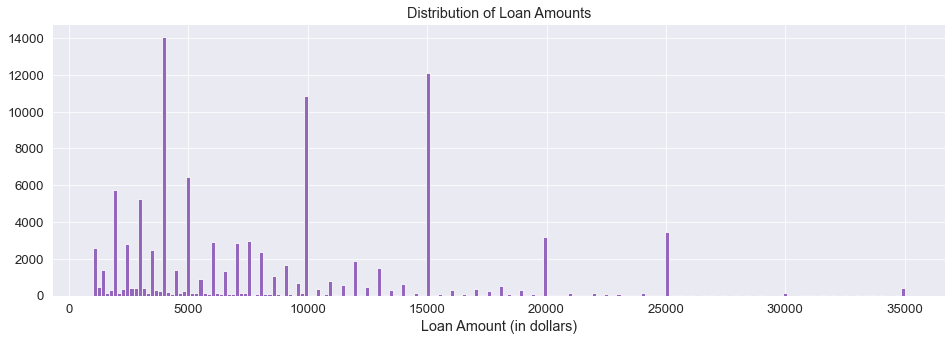

In [32]:
plt.figure(figsize=(16,5))
color=sns.color_palette()[4]

plt.hist(data=loan_df, x="loan_original_amount",color=color,bins=200)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount (in dollars)');

**Back (again) to number of recommendations**


And now we will pay one more last visit for number of recommendation feature. Below we will perform a log transform on different sections of the number of recommendations variable, so that we can have a look at the distribution of borrowers with recommendations without the noise of the very huge number of borrowers with no recommendation. We will explore the distribution for the following:
- Borrowers with or without a recommendation.
- Borrowers with at least one recommendation.
- Borrowers with more than one recommendation.

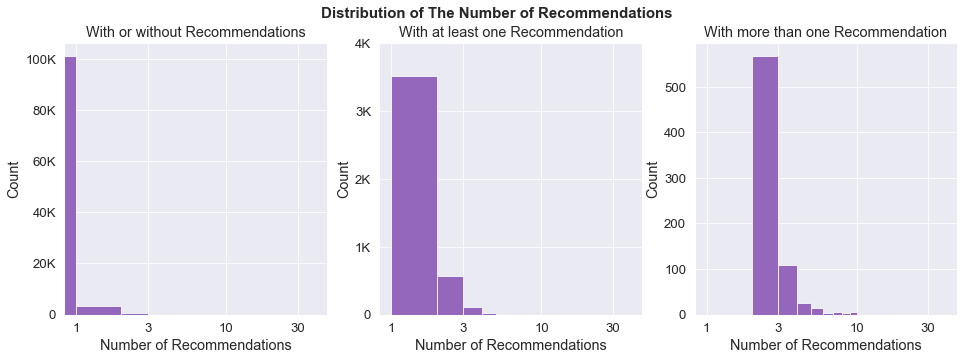

In [33]:
plt.figure(figsize=(16,5))
plt.suptitle('Distribution of The Number of Recommendations', fontsize=15, fontweight='bold')
color=sns.color_palette()[4]

plt.subplot(1,3,1)
bins = np.arange(0,39+1,1)
plt.hist(data=loan_df, x="recommendations",color=color, bins=bins)
plt.xscale('log')
plt.xticks([1,3,10,30],['1','3','10','30'])
plt.yticks([0,2e4,4e4,6e4,8e4,1e5],['0','20K','40K','60K','80K','100K'])
plt.title('With or without Recommendations')
plt.xlabel('Number of Recommendations')
plt.ylabel('Count')

plt.subplot(1,3,2)
bins = np.arange(0,39+1,1)
plt.hist(data=loan_df.loc[loan_df.recommendations > 0], x="recommendations",color=color, bins=bins)
plt.xscale('log')
plt.xticks([1,3,10,30],['1','3','10','30'])
plt.yticks([0,1e3,2e3,3e3,4e3],['0','1K','2K','3K','4K'])
plt.title('With at least one Recommendation')
plt.xlabel('Number of Recommendations')
plt.ylabel('Count');

plt.subplot(1,3,3)
bins = np.arange(0,39+1,1)
plt.hist(data=loan_df.loc[loan_df.recommendations > 1], x="recommendations",color=color, bins=bins)
plt.xscale('log')
plt.xticks([1,3,10,30],['1','3','10','30'])
plt.title('With more than one Recommendation')
plt.xlabel('Number of Recommendations')
plt.ylabel('Count');

- By looking at and comparing the Y-axis alone in the three plots presented above, we can say that borrowers with no recommendations are almost what we have here, the main case. Even in the case of borrowers with recommendations, the number of borrowers with more than one recommendation is falling very dramatically!
- Most borrowers who are having recommendations, only having one. We can even almost divide(although not equally) most of the entries in this variable into two categories 0 and 1.
- There are some cases where we have borrowers with more than even ten recommendations, but these occurances are so very very few compared with the rest of the data.
- Due to the small space of variation in the number of recommendations, with mostly none is the case, this variable will not be of much help to us in determining the loan outcome status.

##### Exploring the remaining quantitative variables


Here we are going to visualize and explore interest rate, annual percentage rate, monthly payment, and employment duration represented by `borrower_rate`, `borrower_apr`, `monthly_loan_payment`, and `employment_status_duration` respectively.


We will start by plotting a histogram to look at the distribution of these four variables.

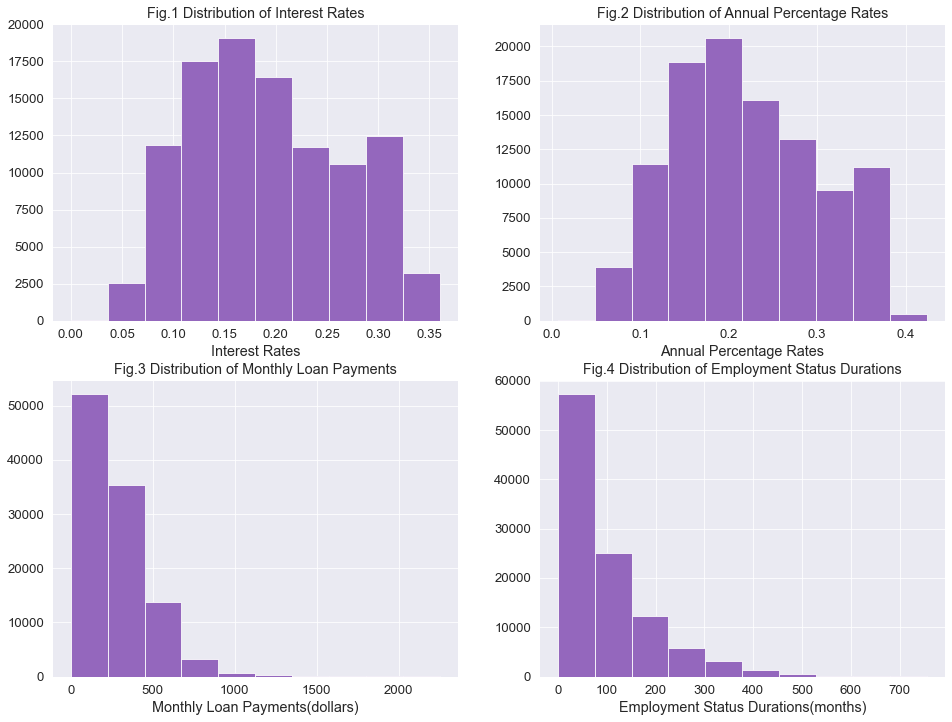

In [34]:
# plotting the distribution of the four variable in four subplots
plt.figure(figsize=(16,12))
color=sns.color_palette()[4]

plt.subplot(2,2,1)
plt.hist(data=loan_df, x="borrower_rate",color=color)
plt.title('Fig.1 Distribution of Interest Rates')
plt.xlabel('Interest Rates')

plt.subplot(2,2,2)
plt.hist(data=loan_df, x="borrower_apr",color=color)
plt.title('Fig.2 Distribution of Annual Percentage Rates')
plt.xlabel('Annual Percentage Rates')

plt.subplot(2,2,3)
plt.hist(data=loan_df, x="monthly_loan_payment",color=color)
plt.title('Fig.3 Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payments(dollars)')

plt.subplot(2,2,4)
plt.hist(data=loan_df, x="employment_status_duration",color=color)
plt.title('Fig.4 Distribution of Employment Status Durations')
plt.xlabel('Employment Status Durations(months)');

- Above are the four histograms using matplotlib default number of bins (10 bins). We may have a more clear look by changing the number of bins.

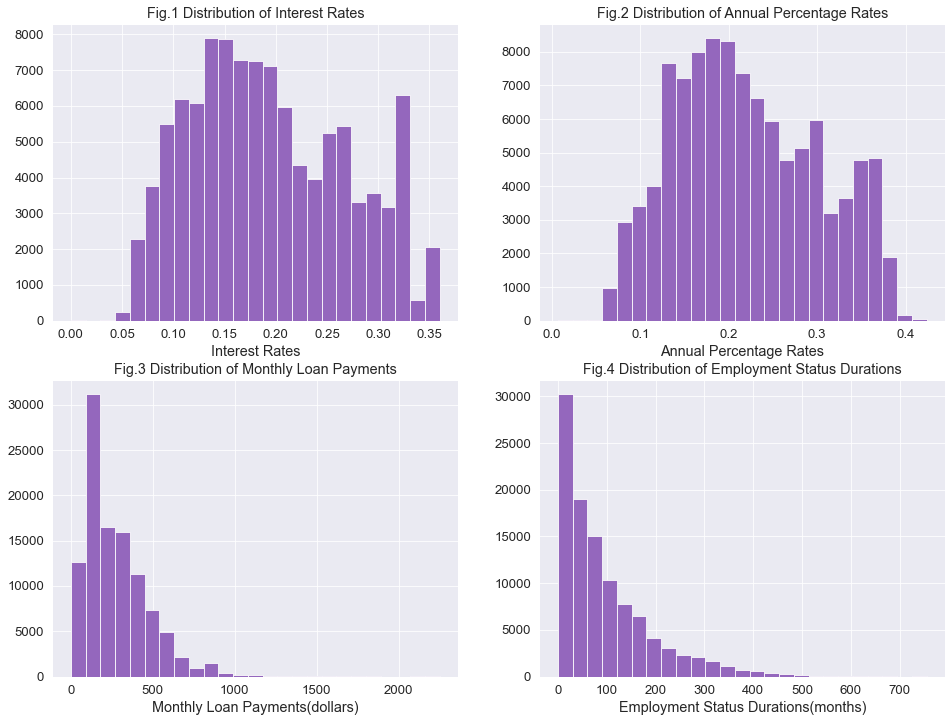

In [35]:
# plotting the four histogram with a larger number of bins
plt.figure(figsize=(16,12))
color=sns.color_palette()[4]

plt.subplot(2,2,1)
plt.hist(data=loan_df, x="borrower_rate",color=color,bins=25)
plt.title('Fig.1 Distribution of Interest Rates')
plt.xlabel('Interest Rates')

plt.subplot(2,2,2)
plt.hist(data=loan_df, x="borrower_apr",color=color,bins=25)
plt.title('Fig.2 Distribution of Annual Percentage Rates')
plt.xlabel('Annual Percentage Rates')

plt.subplot(2,2,3)
plt.hist(data=loan_df, x="monthly_loan_payment",color=color,bins=25)
plt.title('Fig.3 Distribution of Monthly Loan Payments')
plt.xlabel('Monthly Loan Payments(dollars)')

plt.subplot(2,2,4)
plt.hist(data=loan_df, x="employment_status_duration",color=color,bins=25)
plt.title('Fig.4 Distribution of Employment Status Durations')
plt.xlabel('Employment Status Durations(months)');

- In Fig.1, The distribution of interest rates, it is clear that it follows approximately a normal distribution. The majority of interest rates lie in the area between 15 - 20 percent. The number of interest rates above 20 percent tend to decrease. There is a spike in the number of interest rates at about 32 percent after which number of high interest rates continue decreasing again.


- In Fig.2, The distribution of annual percentage rates, it does also follow a normal distribution as we can see in the figur above. The bulk of annual percentage rates is concentrated around 2 percent.


- In Fig.3, The distribution of monthly loan payments in dollars, we can see that the distribution of the data is skewed to the right with almost all falling under 1000 dollar per month.


- In Fig.4, The distribution of employment status duration in months, the distribution in right-skewed. The majority of borrowers are with employment duration under 100 months (about 8 years). The number of borrowers with higher employment duration tend to decrease.

<a id='bivariate'></a>
## <font color='#6495ED'>Bivariate Exploration
    
    
In this section, provided with the help of our insights from the previous univariate exploration, we are going to look at and explore the various relathionships between the different variables. We are going to look at the general relationships between our variables just to have a hint at the big picture, then we will compare them with our main feature of interest, loan outcome status.
    
    
We will start by looking at the relationships between the numeric variables

##### Exploring the relationships between numeric variables

Let's make a quick pair plot between `borrower_rate`, `borrower_apr`, `monthly_loan_payment`, and `employment_status_duration`.

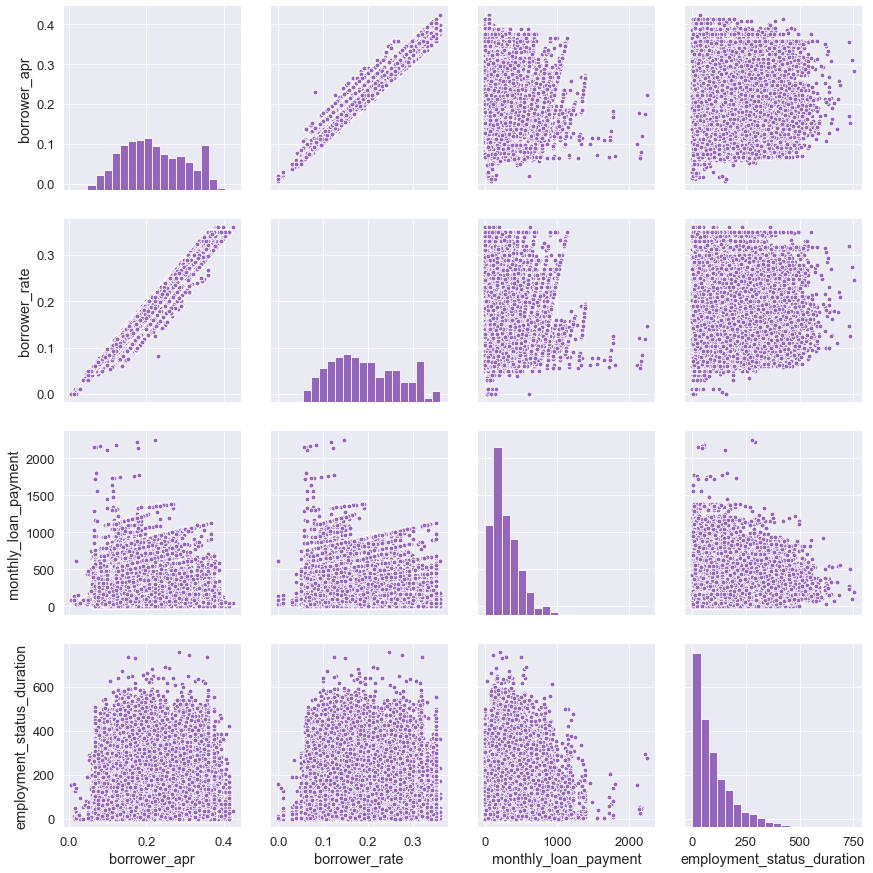

In [36]:
color = sns.color_palette()[4]
var = ['borrower_apr', 'borrower_rate', 'monthly_loan_payment', 'employment_status_duration']

# creating the pair grid
g = sns.PairGrid(data = loan_df, vars=var, height=3)

# specifying the type of diagonal plot
g.map_diag(plt.hist, bins = 20, color=color)

# specifying the type of main plot
g.map_offdiag(sns.scatterplot, color=color);

- The most clear and obvious relationship we can get from the above plot, is the strong positive relationship between the interest rate and the annual percentage rate. We will look at the relationship between them again in more detail then use the interest rate to compare it with other variables.


- There seem to be a weak negative relationship between employment status duration and the monthly loan payment, but we will need a more closer look at it.


- The rest of the plots are not that clear and the data points are distributed all over the plots as seen from above.

Now that we have an idea how the relationships between our variable looks like, let's support our knowledge with a correlation matrix that will show us how the above variables are correlated.

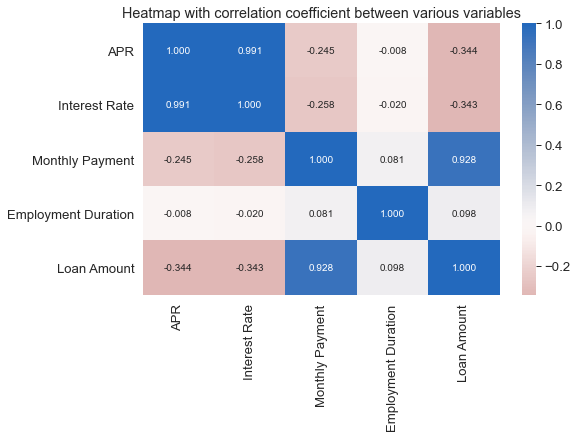

In [37]:
# creating the correlation plot
plt.figure(figsize = [8, 5])
plt.title('Heatmap with correlation coefficient between various variables')
var = ['borrower_apr', 'borrower_rate', 'monthly_loan_payment', 'employment_status_duration','loan_original_amount']

sns.heatmap(loan_df[var].corr(), # calculating the correlation coefficient
            xticklabels=['APR','Interest Rate','Monthly Payment','Employment Duration','Loan Amount'],
            yticklabels=['APR','Interest Rate','Monthly Payment','Employment Duration','Loan Amount'],
            annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

The above heatmap shows the correlation coefficients between supported by color encoding. The relationship gets stronger as the color turns in the blue direction.


- The **strong positive** relationship between interest rate and APR that we found in the pair grid is confirmed here with a correlation coefficient of 0.991 and a strong blue color.


- Also, there is a **weak positive** correlation between the monthly payment and the employment status duration, but it is not a negative relationship (although it's very close) as we suspected before, with a correlation coefficient of 0.081.


- There is a **weak negative** correlation between interest rate and both monthly loan payment and employment status duration, this relationship is weaker in case of employment duration. A correlation coefficient of -0.258 between interest rate and monthly loan payment, and a correlation coefficient of -0.020 between interest rate and employment status duration.


- There is a **moderate negative** correlation between the borrower's interest rate and the original loan amount with a correlation coefficient of -0.343. This is a little confusing, but let's keep in mind that the interest rate here is in percentage. This means that higher loan amount are correlated with the choice of lower interest rate, it doesn't mean that the interest will be less the higher the loan amount gets for the same interest rate.


- There is a **strong positive** correlation between the loan original amount and the monthly loan payment with a correlation coefficient of 0.928. Greater loan amounts tends to have a higher monthly payments.

Now for a more closer look at the different relationships between individual variables.


**Relationship between Interest rate and borrower APR**<br>We already found that there is a strong positive relationship between the two of them, what affects the interest rate will have also the same effect on the borrower APR.

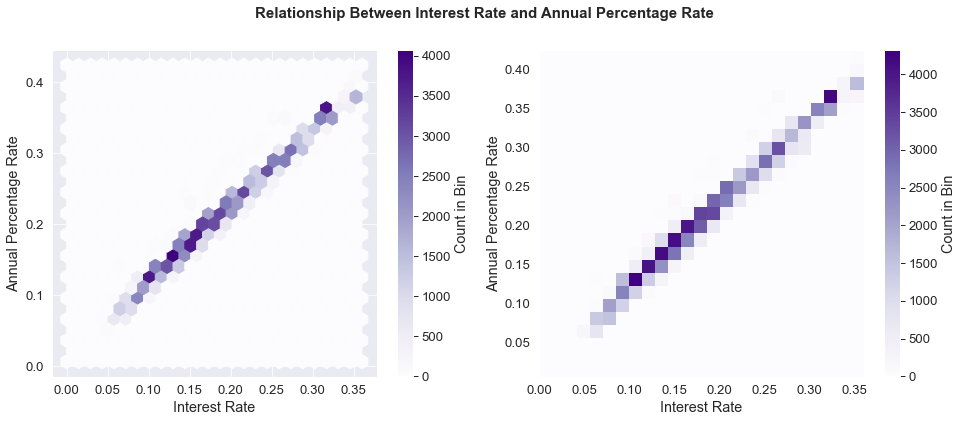

In [38]:
plt.figure(figsize=(16,6))
plt.suptitle('Relationship Between Interest Rate and Annual Percentage Rate', fontsize=15, fontweight='bold')

plt.subplot(1,2,1)
x,y = loan_df.borrower_rate,loan_df.borrower_apr
plt.hexbin(x, y, gridsize=25, cmap='Purples')
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Annual Percentage Rate')

plt.subplot(1,2,2)
plt.hist2d(data = loan_df, x = 'borrower_rate', y = 'borrower_apr', cmap='Purples',bins=25)
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Annual Percentage Rate');

The strong positive relationship is even more obvious here. It is clear that whatever factor that affect the interest rate will have the same effect on the annual percentage rate.


**What factors affect The borrower interest rate?**<br>We will now have a look at the different relationships between the borrower's interest rate and several other variables. This time we will take a random sample of 1000 data points, so that we can easily visualize and understand the plot and not end up with way too many points as in the previous pair grid.

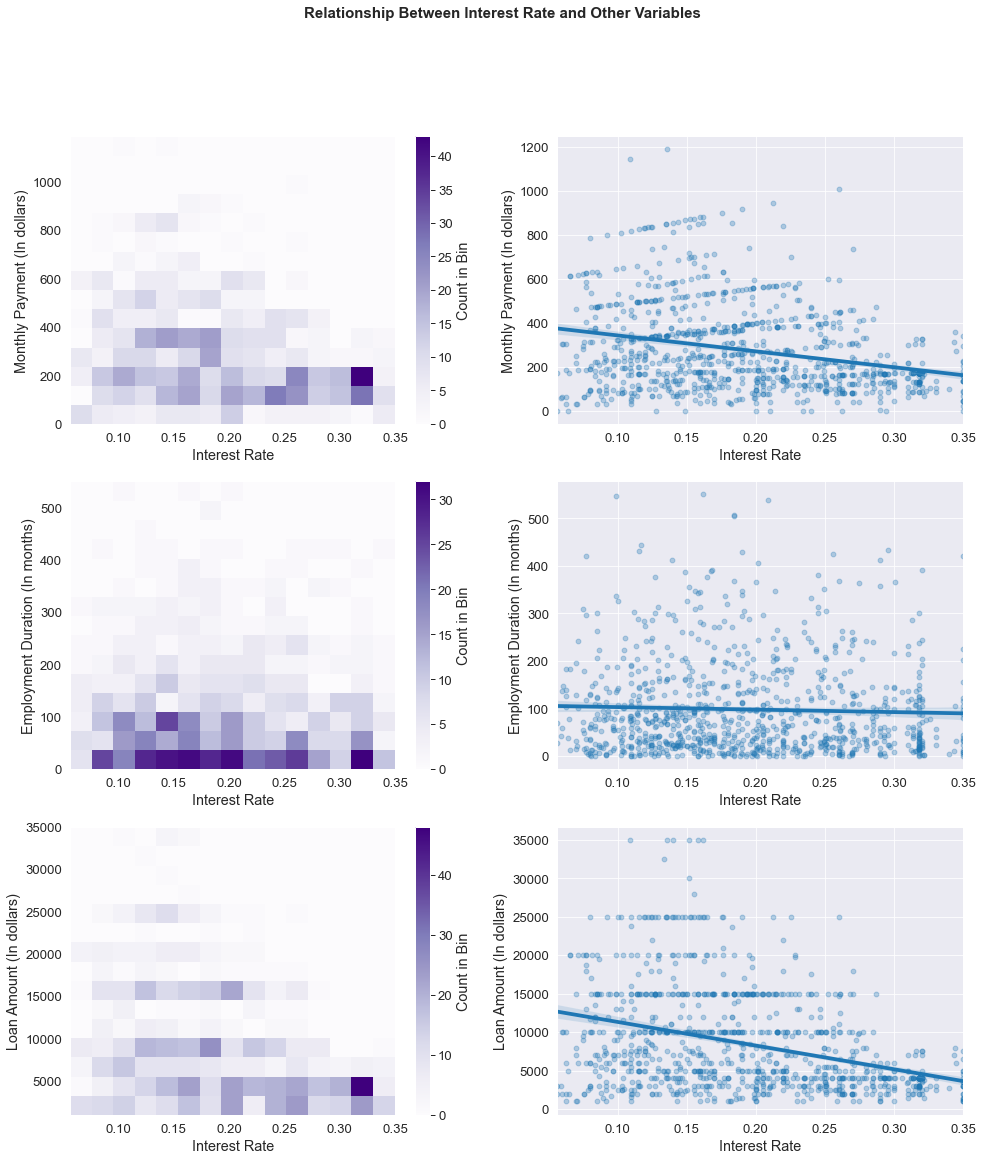

In [39]:
# creating a random sample of 1000 data points for a clearer visualization
samples = np.random.choice(loan_df.shape[0], 1000, replace = False)
loan_sample = loan_df.loc[samples,:]


plt.figure(figsize=(16,18))
plt.suptitle('Relationship Between Interest Rate and Other Variables', fontsize=15, fontweight='bold')

plt.subplot(3,2,1)
plt.hist2d(data = loan_sample, x = 'borrower_rate', y = 'monthly_loan_payment', cmap='Purples',bins=15)
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Monthly Payment (In dollars)')

plt.subplot(3,2,2)
sns.regplot(data = loan_sample, x = 'borrower_rate', y = 'monthly_loan_payment',scatter_kws={'alpha':0.3})
plt.xlabel('Interest Rate')
plt.ylabel('Monthly Payment (In dollars)')

plt.subplot(3,2,3)
plt.hist2d(data = loan_sample, x = 'borrower_rate', y = 'employment_status_duration', cmap='Purples',bins=15)
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Employment Duration (In months)')

plt.subplot(3,2,4)
sns.regplot(data = loan_sample, x = 'borrower_rate', y = 'employment_status_duration',scatter_kws={'alpha':0.3})
plt.xlabel('Interest Rate')
plt.ylabel('Employment Duration (In months)')

plt.subplot(3,2,5)
plt.hist2d(data = loan_sample, x = 'borrower_rate', y = 'loan_original_amount', cmap='Purples',bins=15)
plt.colorbar(label='Count in Bin')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(3,2,6)
sns.regplot(data = loan_sample, x = 'borrower_rate', y = 'loan_original_amount',scatter_kws={'alpha':0.3})
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)');

The figure above shows the relationship between `borrower_rate` and `monthly_loan_payment`, `employment_status_duration`, `loan_original_amount` respectively. The 2d histograms on the left gives us an idea of how data points are distributed, while the scatterplot with the line of best fit on the right gives us a clear look of how the relationship between the two variables looks like.


- Generally, we can spot a negative relationship with varying strength between the interest rate and each of the three variables presented.


**What is the relationship between the interest rate and the loan amount?**
- The relationship between the interest rate and the original loan amount, is the most clearly negative one. This is obvious from the slope of the line and is consistent with the previously calculated correlation coefficient of -0.343 representing a moderate negative correlation.


**What is the relationship between the interest rate and the monthly loan payment?**
- Coming next in strength in terms of negativity is the relationship between the interest rate and monthly loan payment. The line slope is still clear. This is also confirmed by the correlation coefficient previously calculated of -0.258 representing a weak negative correlation between the two.


**What is the relationship between the interest rate and the employment status duration?**
- The weakest negative relationship of the three is the one between interest rate and the employment status duration. As we can see from the representing chart, the slope of the line is barely noticable. This very weak negative relationship has a correlation coefficient of -0.020, the weakest correlation of the three.

##### Relationships between various variables and our main variable of interest


Now let's explore the various relationships between the various variables and our main variable of interest, `loan_status`.

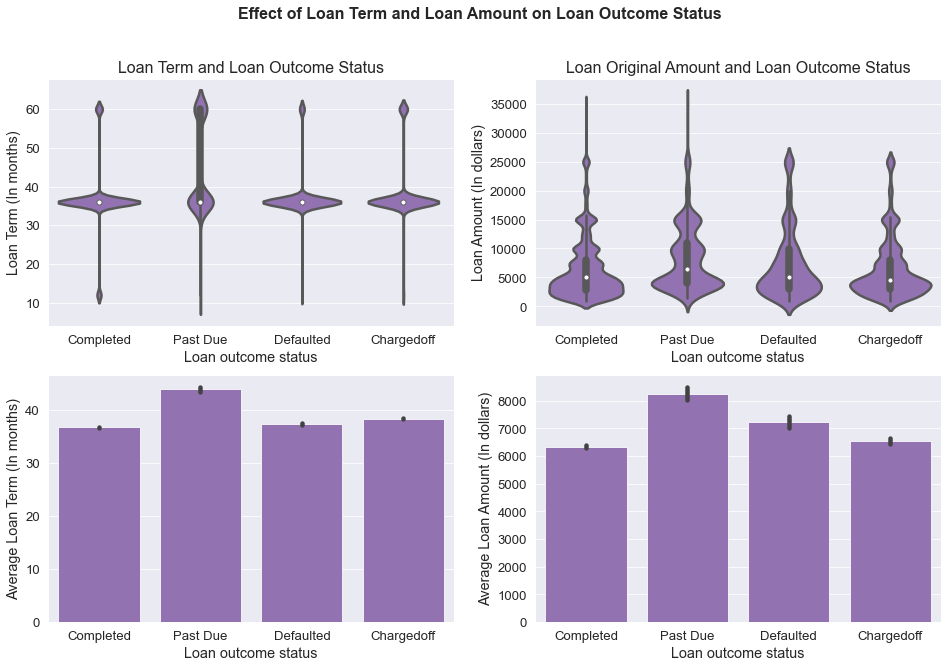

In [40]:
plt.figure(figsize=(16,10))
plt.suptitle('Effect of Loan Term and Loan Amount on Loan Outcome Status', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(2,2,1)
plt.title('Loan Term and Loan Outcome Status', fontsize=16)
sns.violinplot(data=loan_df, x='loan_status', y='term', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Loan Term (In months)')

plt.subplot(2,2,2)
plt.title('Loan Original Amount and Loan Outcome Status', fontsize=16)
sns.violinplot(data=loan_df, x='loan_status', y='loan_original_amount', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(2,2,3)
sns.barplot(data=loan_df, x='loan_status', y='term', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Loan Term (In months)')

plt.subplot(2,2,4)
sns.barplot(data=loan_df, x='loan_status', y='loan_original_amount', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Loan Amount (In dollars)');

Here we are looking at the relationships between `loan_status` and `term`, `loan_original_amount`.


**What is the effect of the loan term on the loan outcome status?**<br>Is there a relationship between the loan term duration and the loan outcome?, The violinplot above shows us were the bulk of the data points are and how they are distributed, as we can see most of the data points in loan term lie between 30 and 40 months, but what does this tell us about its relation with loan outcome status? the violinplot does not tell us much.<br>The adapted bar chart below, having the average loan term on the y-axis against loan outcome status on the x-axis, shows us that on average loans that are not completed tends to have a longer loan term.


**What is the effect of the loan amount on the loan outcome status?**<br>The bulk of the loan original amount data points lie below 10000, with non-completed loans having a slightly bigger median loan amount than completed loans as seen in the violinplot.<br>The relationship between the original loan amount and loan status is clearer in the adapted bar chart, having the average loan amount on the y-axis against loan outcome status on the x-axis, we can see that on average non-completed loans tend to have larger loan amounts than completed loans.

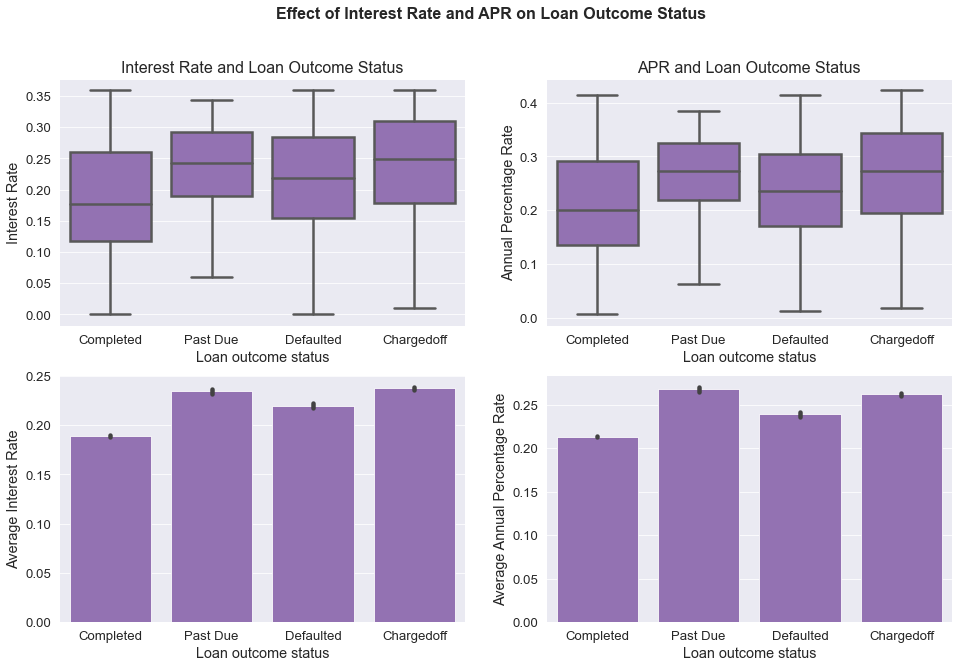

In [41]:
plt.figure(figsize=(16,10))
plt.suptitle('Effect of Interest Rate and APR on Loan Outcome Status', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(2,2,1)
plt.title('Interest Rate and Loan Outcome Status', fontsize=16)
sns.boxplot(data=loan_df, x='loan_status', y='borrower_rate', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Interest Rate')

plt.subplot(2,2,2)
plt.title('APR and Loan Outcome Status', fontsize=16)
sns.boxplot(data=loan_df, x='loan_status', y='borrower_apr', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Annual Percentage Rate')

plt.subplot(2,2,3)
sns.barplot(data=loan_df, x='loan_status', y='borrower_rate', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Interest Rate')

plt.subplot(2,2,4)
sns.barplot(data=loan_df, x='loan_status', y='borrower_apr', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Annual Percentage Rate');

Now let's have a look at the relationship between `loan_status` and `borrower_rate`, `borrower_apr`.


**What is the effect of the interest rate and the annual percentage rate on the loan outcome status?**<br>We have found out about the strong positive relationship between the interest rate and the annual percentage rate, so it's clear that they will probably have the same effect on the loan outcome status.<br> The boxplot shows us that the median interest rate and apr tends to be higher in the case of non-completed loans. Completed loans have the lowest median interest rate and apr.<br>This is supported by the adapted bar charts below, with the average interest rate and average annual percentage rate on the y-axis against the loan status on the x-axis, we can clearly see that on average non-completed loans tend to haver higher interest rate and apr. Completed loans have the lowest average in both interest rate and apr.

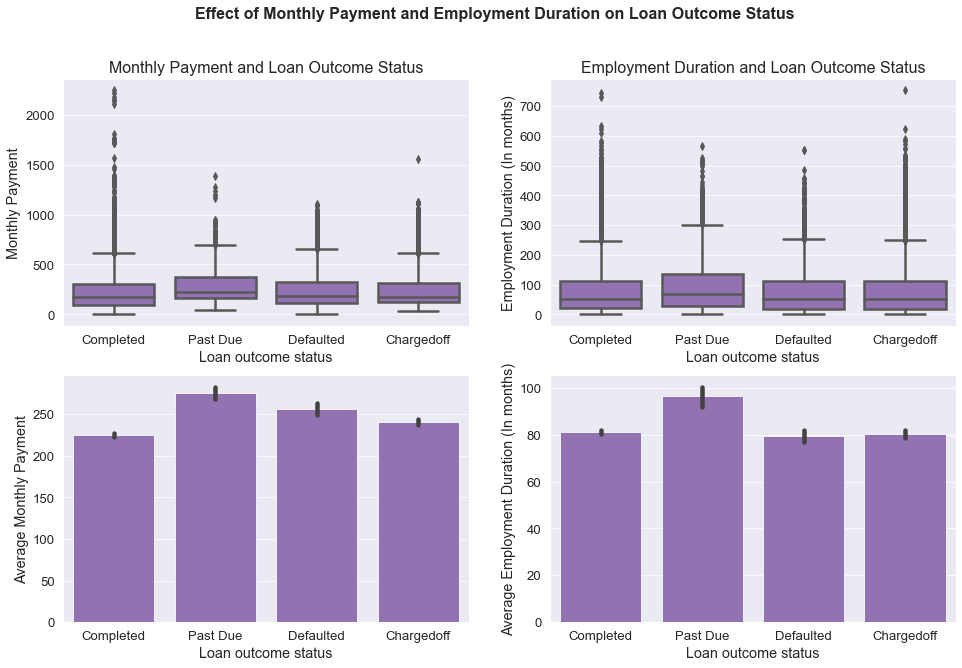

In [42]:
plt.figure(figsize=(16,10))
plt.suptitle('Effect of Monthly Payment and Employment Duration on Loan Outcome Status', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(2,2,1)
plt.title('Monthly Payment and Loan Outcome Status', fontsize=16)
sns.boxplot(data=loan_df, x='loan_status', y='monthly_loan_payment', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Monthly Payment')

plt.subplot(2,2,2)
plt.title('Employment Duration and Loan Outcome Status', fontsize=16)
sns.boxplot(data=loan_df, x='loan_status', y='employment_status_duration', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Employment Duration (In months)')

plt.subplot(2,2,3)
sns.barplot(data=loan_df, x='loan_status', y='monthly_loan_payment', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Monthly Payment')

plt.subplot(2,2,4)
sns.barplot(data=loan_df, x='loan_status', y='employment_status_duration', color=color)
plt.xlabel('Loan outcome status')
plt.ylabel('Average Employment Duration (In months)');

And now for the relationship between `loan_status` and `monthly_loan_payment`, `employment_status_duration`.


**What is the effect of the monthly loan payment on the loan outcome status?**<br>We can see from the boxplot showing the relationship between the monthly payment and the loan outcome, that most monthly payments have a median amount below 500 dollars per month with lots of outliers clearly observed. completed loans have slightly smaller median monthly payments than non-completed ones.<br> The adapted bar chart, supporting what we have just found and having the average monthly payment on the y-axis plotted against the loan outcome, shows us that on average non-completed loans tend to have a higher average monthly payments than completed loans. The difference here is more prominent than it is in the boxplot because means are more sensitive to outliers than medians.


**What is the effect of employment duration on the loan outcome status?**<br>From our previous univariate explorations, we have found that almost all the borrowers in our dataset are employed. And according to this employment duration are more meaningful when exploring the effect on the loan outcome. Do longer or shorter durations of employment affect the loan outcome?. The boxplot showing the relationship between employment duration and the loan outcome, tells us that most borrowers have employment duration below 100 months (about 8 years) but many outliers exist.The difference between the median employment duration between completed and non-completed loans is too small and almost unnoticeable.<br> The adapted bar chart with average employment duration on the y-axis against loan outcome on the x-axis, shows us a prominently higher employment duration in loans that are past due, but this could be attributed to outliers which affect the mean.

Following below, we are going to facet `loan_status` and look at the distribution of the previously compared variable at each individual outcome. We do not need all the details of the histogram now, so we will use a KDE plot to visualize the variable distribution. This will make the shape of the distribution more obvious and clear.

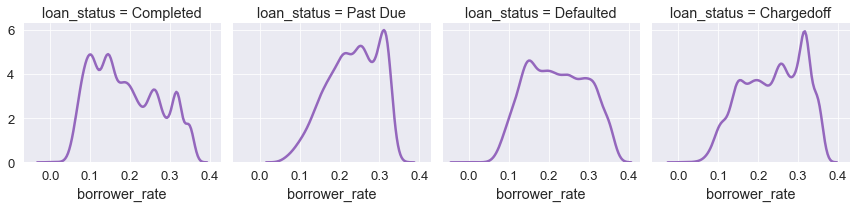

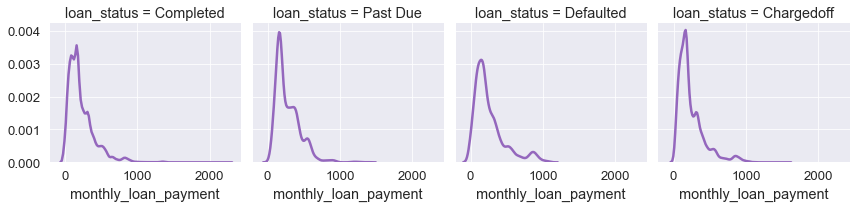

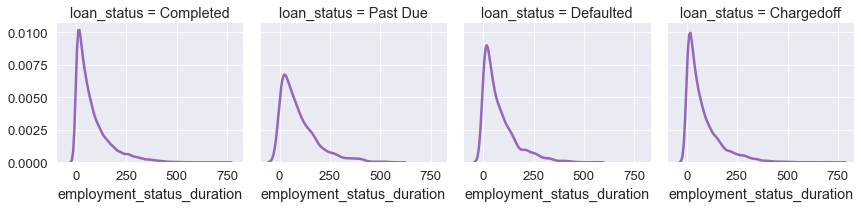

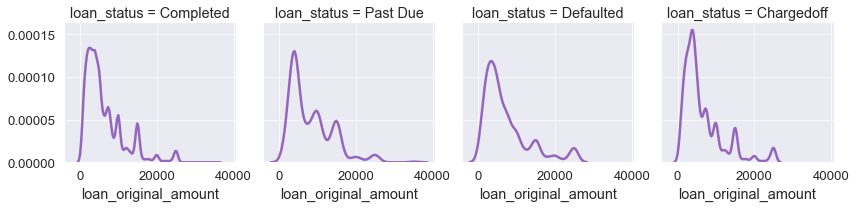

In [43]:
color = sns.color_palette()[4]

# distribution of interest rate for each loan outcome
sns.FacetGrid(data=loan_df, col='loan_status').map(sns.kdeplot,'borrower_rate', color=color)

# distribution of monthly payment for each loan outcome
sns.FacetGrid(data=loan_df, col='loan_status').map(sns.kdeplot, 'monthly_loan_payment', color=color)

# distribution of employment duration for each loan outcome
sns.FacetGrid(data=loan_df, col='loan_status').map(sns.kdeplot, 'employment_status_duration', color=color)

# distribution of loan amount for each loan outcome
sns.FacetGrid(data=loan_df, col='loan_status').map(sns.kdeplot, 'loan_original_amount', color=color);

- **How interest rate is distributed across different outcomes?**<br>From the first four plots we can see the difference in the distribution of interest rate across completed and non-completed loans. The distribution of interest rate in completed loans is slightly right-skewed with the most data points having lower interest rate. The distribution of interest rate in non-completed loans is left-skewed with the most data points having higher interest rate.


- **How monthly payments are distributed across different outcomes?**<br>The distribution of monthly loan payments is right-skewed in the different outcomes, but completed loans show higher density of data points with lower monthly payments than non-completed loans.


- **How employment durations are distributed across different outcomes?**<br>The distribution of employment duration is also right-skewed across all outcomes. From the four distributions, we see that most of the data is concentrated at a 100 months employment duration in the different outcomes.


- **How original loan amounts are distributed across different outcomes?**<br>From the last four plots, we can see that the distribution of original loan amount across different outcomes is right-skewed. Completed loans noticeably have lower amounts of data points with high original loan amounts than the case in non-completed loans.

Does propser rating has anything to say about the loan outcome? Are lower risk loans more likely to get completed than higher risk ones?. Below we are going to explore the relationship between `loan_status` and `prosper_rating` and we are going to try to answer those questions.

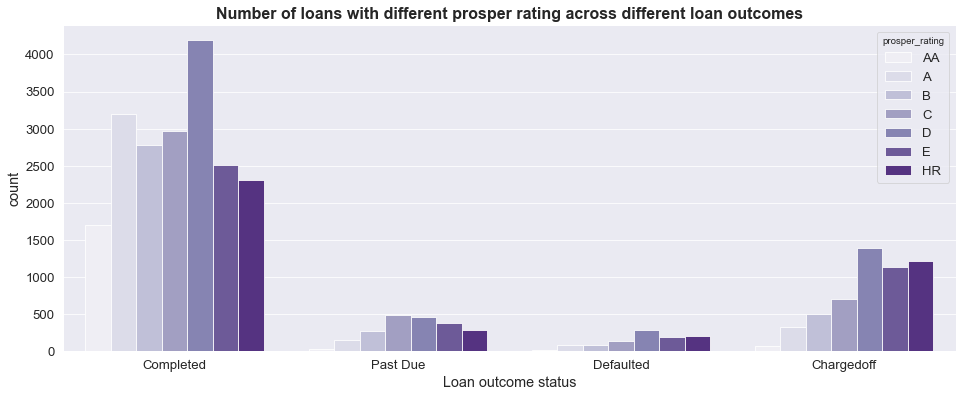

In [44]:
plt.figure(figsize=(16,6))
plt.title('Number of loans with different prosper rating across different loan outcomes', fontsize=16, fontweight='bold')
sns.countplot(data=loan_df, x='loan_status',
              hue='prosper_rating', hue_order=['AA','A','B','C','D','E','HR'],
              palette='Purples')
plt.xlabel('Loan outcome status');

- The number of data points in completed loans are much greater than the number of data points in the other outcomes. Perhaps we can get a more clear picture if we plotted against the proportion instead of the count.

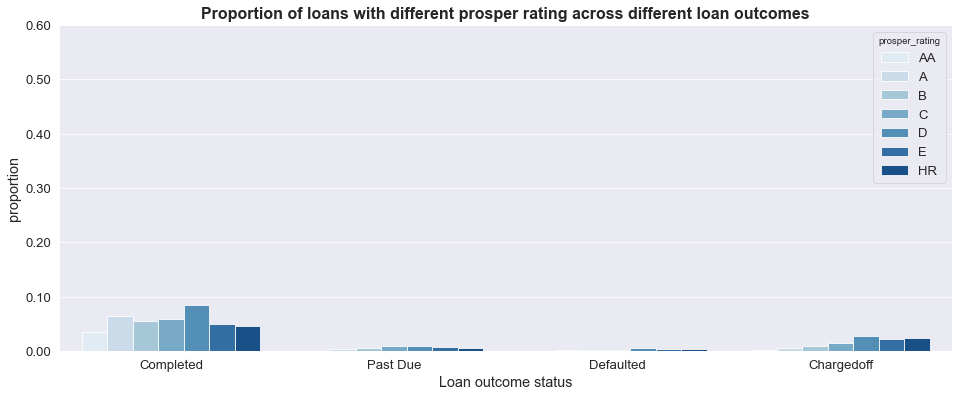

In [45]:
n_status = loan_df['loan_status'].value_counts().sum()
max_status_count = loan_df['loan_status'].value_counts()[0]
max_prop = max_status_count/n_status

tick_props = np.arange(0,max_prop,0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.figure(figsize=(16,6))
plt.title('Proportion of loans with different prosper rating across different loan outcomes', fontsize=16, fontweight='bold')

sns.countplot(data=loan_df, x='loan_status',
              hue='prosper_rating', hue_order=['AA','A','B','C','D','E','HR'],
              palette='Blues')
plt.yticks(tick_props*n_status, tick_names)
plt.xlabel('Loan outcome status')
plt.ylabel('proportion');

We now have a modified clustered bar chart with the y-axis showing propprtions and not counts.


- In the above clustered bar chart, different prosper rating are represented by the different color gradients, with higher risk ratings more closer to dark blue and lower risk ratings more close to faint blue.
- The differences in proportions is not that much subtle, but we can see that the proportion of higher risk ratings (D, E, and HR) to lower risk ratings (AA, A, and B) is slightly higher in non-completed loans than completed loans. 

But what about the relationship between the *interest rate* and *prosper rating*. We have found that higher interest rates are correlated with non-completed loans and lower interest rates with completed loan. Is there a similar relationship between the interest rate and prosper rating?

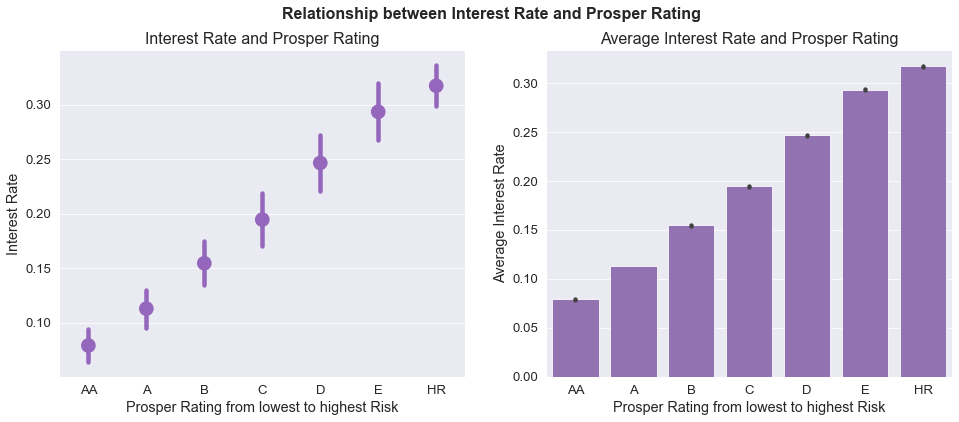

In [46]:
plt.figure(figsize=(16,6))
plt.suptitle('Relationship between Interest Rate and Prosper Rating', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(1,2,1)
plt.title('Interest Rate and Prosper Rating', fontsize=16)
sns.pointplot(data=loan_df, x='prosper_rating', y='borrower_rate', color=color, ci='sd', linestyles="")
plt.xlabel('Prosper Rating from lowest to highest Risk')
plt.ylabel('Interest Rate')

plt.subplot(1,2,2)
plt.title('Average Interest Rate and Prosper Rating', fontsize=16)
sns.barplot(data=loan_df, x='prosper_rating', y='borrower_rate', color=color)
plt.xlabel('Prosper Rating from lowest to highest Risk')
plt.ylabel('Average Interest Rate');

- **Are loans with higher interest rates more likely to have a high risk prosper rating?**<br>Both the above two plots give us a very clear and obvious look at the relationship between the interest rate and the prosper rating. We can see from the pointplot that interest rates show steady increase as we move to higher risk ratings. Higher interest rates are associated with higher risk ratings.<br>The adapted bar chart also tells the same story. Having the average interest rate plotted on the y-axis against prosper ratings on the x-axis, we can say that on average as the interest rate gets higher, the more likely it is to get a higher risk rating.

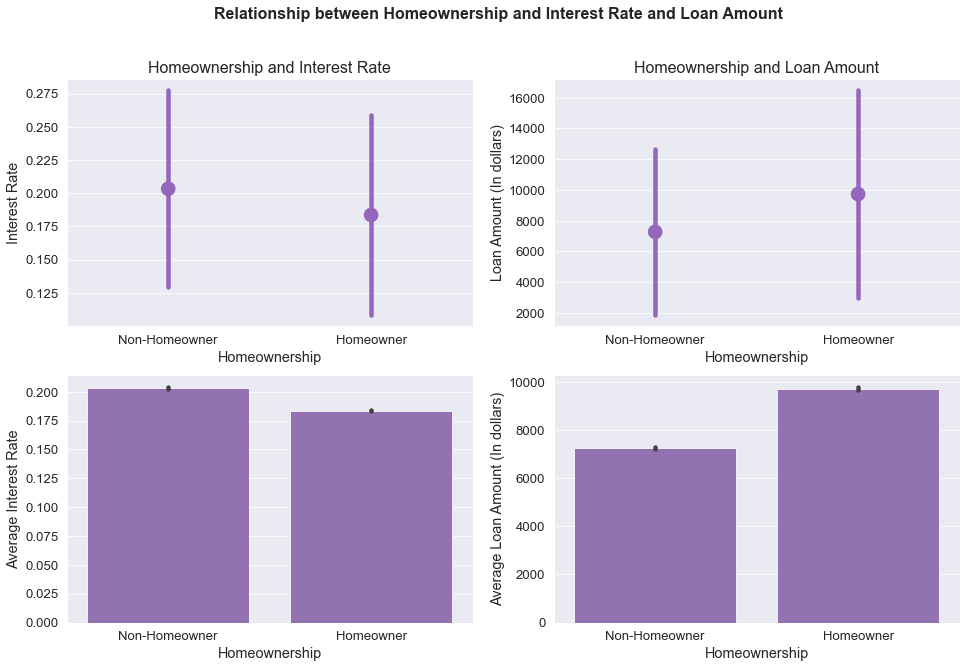

In [47]:
plt.figure(figsize=(16,10))
plt.suptitle('Relationship between Homeownership and Interest Rate and Loan Amount', fontsize=16, fontweight='bold')
color = sns.color_palette()[4]

plt.subplot(2,2,1)
plt.title('Homeownership and Interest Rate', fontsize=16)
sns.pointplot(data=loan_df, x='is_borrower_homeowner', y='borrower_rate', color=color, ci='sd', linestyles="")
plt.xticks([False,True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership')
plt.ylabel('Interest Rate')

plt.subplot(2,2,2)
plt.title('Homeownership and Loan Amount', fontsize=16)
sns.pointplot(data=loan_df, x='is_borrower_homeowner', y='loan_original_amount', color=color, ci='sd', linestyles="")
plt.xticks([False,True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(2,2,3)
sns.barplot(data=loan_df, x='is_borrower_homeowner', y='borrower_rate', color=color)
plt.xticks([False,True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership')
plt.ylabel('Average Interest Rate')

plt.subplot(2,2,4)
sns.barplot(data=loan_df, x='is_borrower_homeowner', y='loan_original_amount', color=color)
plt.xticks([False,True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership')
plt.ylabel('Average Loan Amount (In dollars)');

What about homeownership now? can owning a home have an effect on the loan amount or the interest rate?. The above charts tell us everything.


**Do homeowners get higher interest rates than non-homeowners?**<br>From the charts above we can say no. On average homeownership is associated with lower interest rates.


**Do homeowners get higher loan amounts than non-homeowners?**<br>Homeownership is associated with a more average loan amounts than non-homeowners.

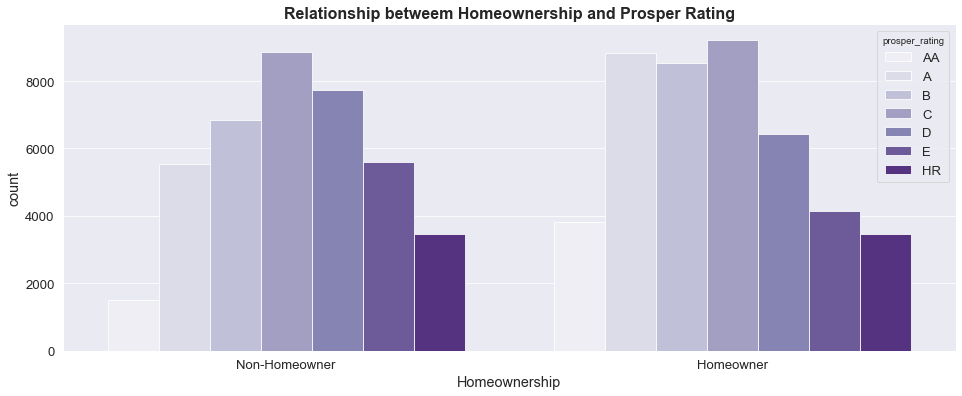

In [48]:
plt.figure(figsize=(16,6))
plt.title('Relationship betweem Homeownership and Prosper Rating', fontsize=16, fontweight='bold')
sns.countplot(data=loan_df, x='is_borrower_homeowner', hue='prosper_rating', palette='Purples')
plt.xticks([False,True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership');

**Does homeownership have an effect on prosper rating?**<br> There is a little difference in the proportions between lower risk ratings and higher risk ratings in homeowners and non-homeowners. Homeowners have a higher proportion of lower risk ratings.

**Based on the previous univariate and bivariate explorations, which features have the most prominent effect on the loan outcome?**<br>From our univariate and bivariate explorations we have observed many interesting relationships between different variables. Some featured proved unhelpful by not having enough data to make a meaningful comparison, others proved even more interesting at closer looks. Concerning our main feature of interest, which is the loan outcome, we found these variables interesting:
  - `borrower_rate` and `borrower_apr` : By far at this moment, those are the greatest in terms of impact effect on the loan outcome. many other features affecting the loan outcome could be more clearly observed by comparing it to this variable. In general, the higher the interest rate, the likely the loan to not be completed.
  - `monthly_loan_payment` : We have found that as the monthly loan payment gets higher, the more likely the loan to not be completed.
  - `loan_original_amount` : We have found that as the original loan amount gets higher, the more likely the loan to not be completed.
  - `prosper_rating` : We have found that higher risk ratings are associated with higher interest rates, which in turn can affect the loan outcome.
  - `is_borrower_homeowner` : Homeownership is associated with higher average loan amounts and lower average interest rates.
  - `term` : This varaible does't have a great effect as the previously mentioned variables, but still a slight effect can be noticeable as borrowers with shorter loan terms are slightly more likely not to complete the loan.
  - `employment_status_duration` : This variable may have the weakest effect and not of much help to us in trying to predict the loan outcome. We have found that almost all borrowers have about 100 months of employment duration, and by comparing it across different outcomes we found that the longest average employment duration fall in the past due category.

<a id='multivariate'></a>
## <font color='#6495ED'>Multivariate Exploration
    
    
In this section, we are going to look at and explore the relationships between more than two variables and try to get a deeper understanding of what factors could affect the loan outcome.
    

Provided with the insights from our previous univariate and bivariate explorations, we will have a look at a little more complex interaction between more than two variables. Here we are especially interest in the interactions and relationships between loan outcome and prosper rating vs other variables.

- We will compare the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across different ratings of `prosper_rating`.
- We will compare the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across different outcomes of `loan_status`.
- We will compare the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across the two outcomes of `is_borrower_homeowner`.
- Finally, we will compare the three grids with each others and see if there are any matchings.

**Comparing the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across different ratings of `prosper_rating`.**

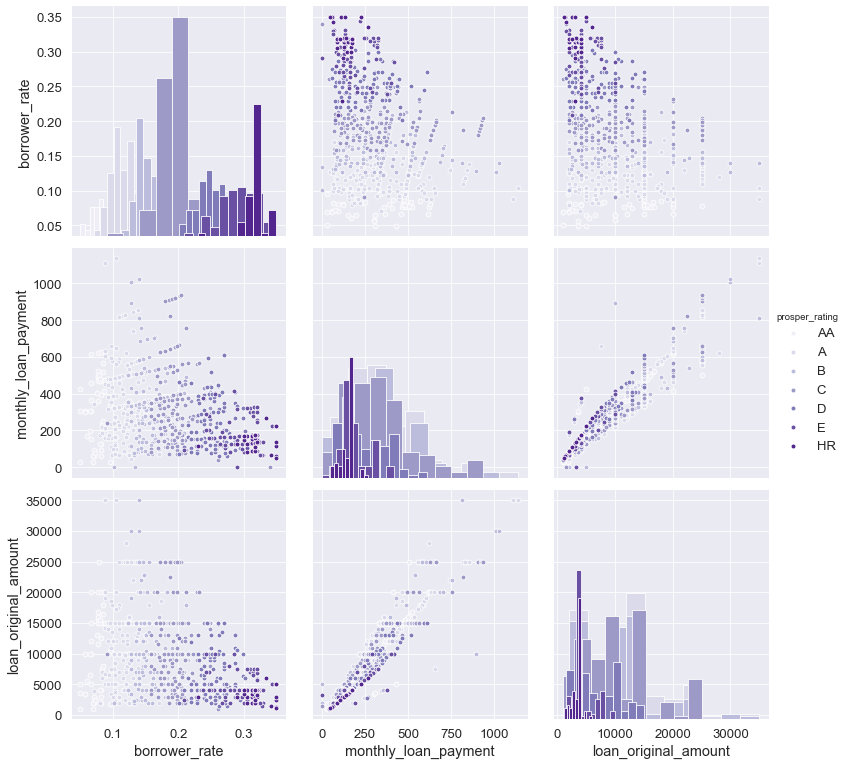

In [49]:
samples = np.random.choice(loan_df.shape[0], 1000, replace = False)
loan_sample = loan_df.loc[samples,:]


# creating the pair grid
g = sns.PairGrid(data = loan_sample, vars=['borrower_rate','monthly_loan_payment','loan_original_amount'],
                 hue='prosper_rating',
                 hue_order=['AA','A','B','C','D','E','HR'],
                 palette='Purples',
                 height=3.5)

# specifying the type of diagonal plot
g.map_diag(plt.hist)

# specifying the type of main plot
g.map_offdiag(sns.scatterplot)

g.add_legend();

- We can see from the above graph that loans with both high interest rate and low original amount tends to get more high risk ratings. We have found from the bivariate exploration that there is a positive relationship between the interest rate and the prosper rating, while there is a negative relationship between the interest rate and the original loan amount.


- Also loans with both high interest rate and low monthly loan payments tend to get more high risk ratings. We have found from the bivariate exploration that there is a positive relationship between the interest rate and the prosper rating, while there is a negative relationship between the interest rate and the monthly loan payment.


- The obvious positive relationship evident from the above graph between the original loan amount and the monthly loan payment confirms the two previous points.


**How may the interest rate and the loan original amount affect the prosper rating?**<br>From the presented graph and the above findings, we can say that loans with lower original amount and higher interest rate are more likely associated with getting higher risk ratings.

**Comparing the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across different outcomes of `loan_status`.**

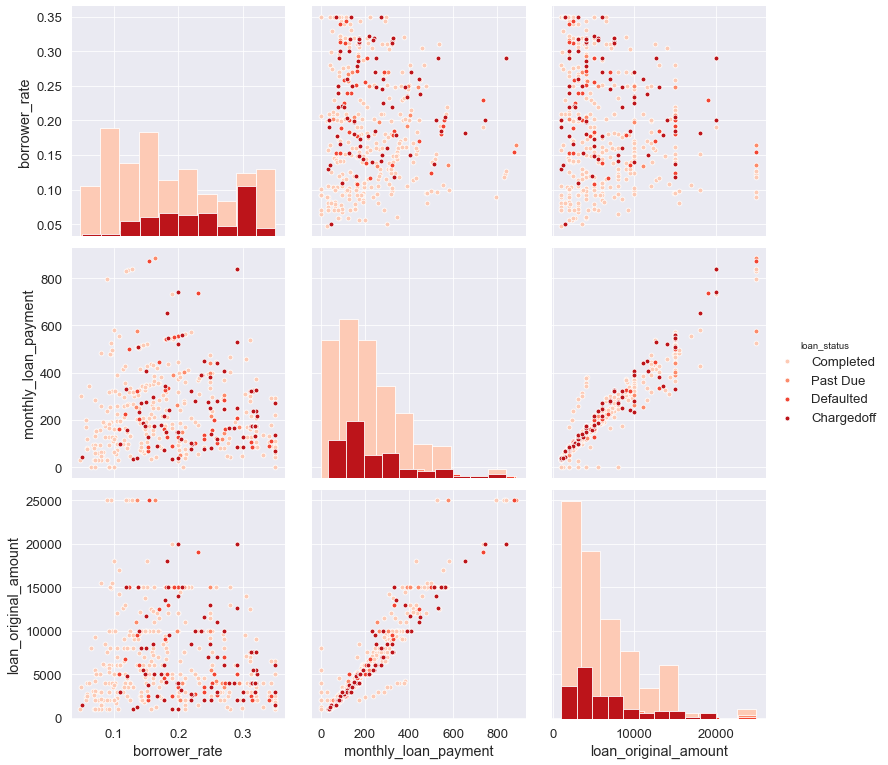

In [50]:
samples = np.random.choice(loan_df.shape[0], 1000, replace = False)
loan_sample = loan_df.loc[samples,:]


# creating the pair grid
g = sns.PairGrid(data = loan_sample, vars=['borrower_rate','monthly_loan_payment','loan_original_amount'],
                 hue='loan_status',
                 palette='Reds',
                 height=3.5)

# specifying the type of diagonal plot
g.map_diag(plt.hist)

# specifying the type of main plot
g.map_offdiag(sns.scatterplot)

g.add_legend();

- Now our main variable of interest, we can see from the above graph that loans with both high interest rate and low original amount is where most of the non-completed loans are concentrated which is evident from the dark red color. We have found from the bivariate exploration that non-completed loans tend to have higher interest rates and higher loan amounts when compared to each one separately, but here when we combine the three together got a more accurate picture of where most of the non-completed loans are found.


- Also loans with both high interest rate and low monthly loan payments is where most of the non-completed loans are concentrated which is evident from the dark red color. Same case here, from the bivariate exploration that non-completed loans tend to have higher interest rates and higher monthly payments when compared to each one separately, but here when we combine the three together got a more accurate picture of where most of the non-completed loans are found.


- Also here the positive relationship between the original loan amount and the monthly loan payment which is clear from the above graph, confirms the two previous points.


**How may the interest rate and the loan original amount affect the loan outcome?**<br>From the presented graph and the above findings, we can say that loans with lower original amount and higher interest rate are more likely associated with non-completed loans. Higher loans amounts are more likely to be associated with non-completed loans when compared separately, but this changes when we add other variables into the picture.

**Comparing the interactions of `borrower_rate` ,`monthly_loan_payment` , `loan_original_amount` across the two outcomes of `is_borrower_homeowner`.**

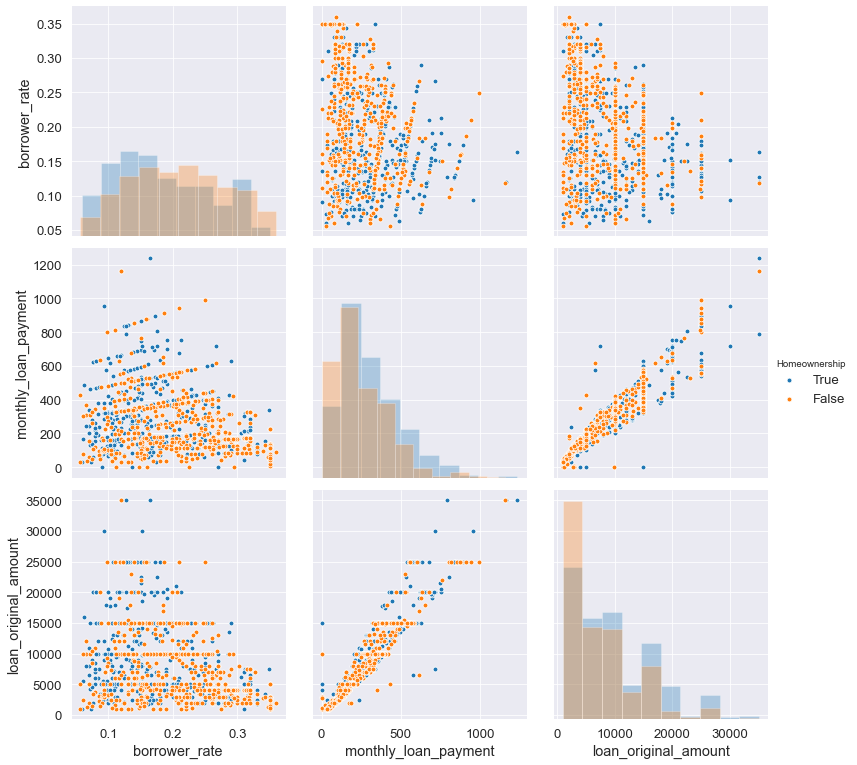

In [51]:
samples = np.random.choice(loan_df.shape[0], 1000, replace = False)
loan_sample = loan_df.loc[samples,:]


# creating the pair grid
g = sns.PairGrid(data = loan_sample, vars=['borrower_rate','monthly_loan_payment','loan_original_amount'],
                 hue='is_borrower_homeowner', hue_order=[True, False],
                 height=3.5)

# specifying the type of diagonal plot
g.map_diag(plt.hist, alpha=0.3)

# specifying the type of main plot
g.map_offdiag(sns.scatterplot)

g.add_legend(title='Homeownership');

- As we see, the data points are dispersed across the graphs, but it is some what consistent with our findings from the bivariate exploration. Homeowners tend to have high loan amount and low interest rate. This is evident from the above charts as we can see most of the data points representing non-homeowners (orange color) are concentrated at low original loan amount and higher interest rate, while homeowners (blue color) at higher original loan amounts and lower interest rates.


- It may be the case that owning a home could act as an insurance for getting higher loan amounts which consequently could affect the interest rate of the loan.


**How may owning a home affect the interest rate and the original loan amount?**<br>From our bivariate explorations we have found that homeowners tend to get on average higher loan amounts than non-homeowners. Also homeowners are on average associated with lower interest rate than non-home owners. Combining the three variables as seen in the above graph, we found that homeowners are more likely to have higher loan original amount and lower interest rates, which confirms bivariate finding. As we said in the above finding, owning a home may facilitate getting higher loan amounts which consequently affect the interest rate.

**Does owning a home have any effect on the loan's prosper rating and interest rate?**<br> To find out the answer to this question, we will plot the various different ratings given to homeowners and non-home owners against the average interest rate.

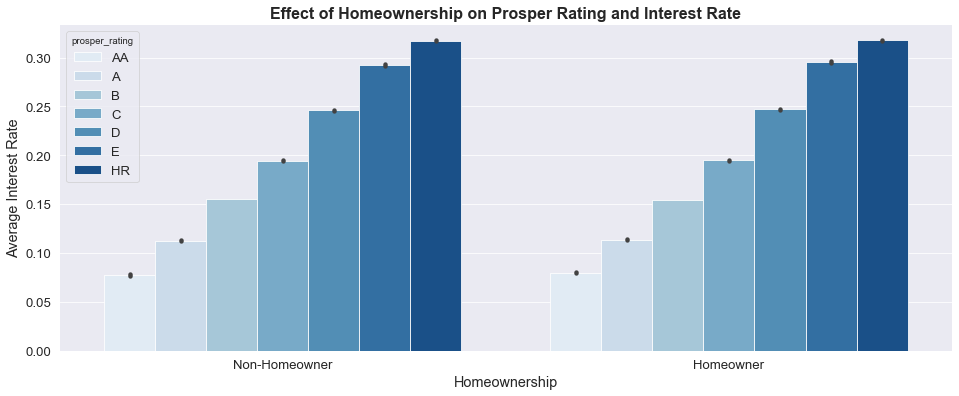

In [52]:
plt.figure(figsize=(16,6))

plt.title('Effect of Homeownership on Prosper Rating and Interest Rate', fontsize=16, fontweight='bold')
sns.barplot(data=loan_df, x='is_borrower_homeowner', y='borrower_rate', 
            hue='prosper_rating',hue_order=['AA','A','B','C','D','E','HR'],
            palette='Blues')
plt.xticks([False, True],['Non-Homeowner','Homeowner'])
plt.xlabel('Homeownership')
plt.ylabel('Average Interest Rate');

As we can see from the above graph, homeownership has no effect on prosper rating or the interest rate in comparing the three variables together. In the two cases the bar heights are almost slightly the same.

The previous multivariate explorations showed the interaction between several variables with each others:


- We found that high risk prosper ratings could be associated with lower loan amounts and higher interest rates. And that lower loan amounts are associated with lower monthly loan payments.


- We found that non-completed loans could be associated with lower loan amounts and higher interest rates. And that lower loan amounts are associated with lower monthly loan payments.


- The above two points shows us that non-completed loans could be associated with higher risk prosper ratings.


- Homeownership could be associated with higher laon amounts and lower interest rates, but it has no effect on prosper ratings.

**A closer look at the interaction between the interest rate and the original loan amount across both loan outcomes and prosper ratings.**

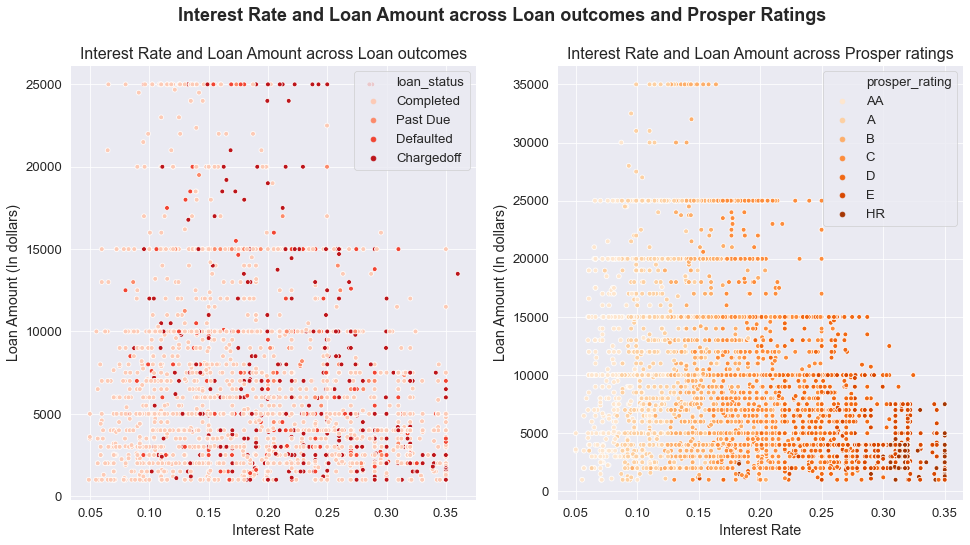

In [53]:
# creating random sample of 5000 data points
samples = np.random.choice(loan_df.shape[0], 5000, replace = False)
loan_sample = loan_df.loc[samples,:]

plt.figure(figsize=(16,8))
plt.suptitle('Interest Rate and Loan Amount across Loan outcomes and Prosper Ratings', fontsize=18, fontweight='bold')

plt.subplot(1,2,1)
plt.title('Interest Rate and Loan Amount across Loan outcomes', fontsize=16)
sns.scatterplot(data=loan_sample, x='borrower_rate', y='loan_original_amount',
                hue='loan_status',hue_order=['Completed','Past Due','Defaulted','Chargedoff'], palette='Reds')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)')

plt.subplot(1,2,2)
plt.title('Interest Rate and Loan Amount across Prosper ratings', fontsize=16)
sns.scatterplot(data=loan_sample, x='borrower_rate', y='loan_original_amount',
                hue='prosper_rating', hue_order=['AA','A','B','C','D','E','HR'], palette='Oranges')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount (In dollars)');

Looking at the two charts next to each others, we can see that interest rates and original loan amount may indicate prosper rating and the loan outcome. The concentration of parallel data points are almost the same in the two charts, which means that prosper ratings may be a good indicator for predicting loan outcomes.

**One more closer look at the interaction between the interest rate and the original loan amount across both loan outcomes and prosper ratings.**

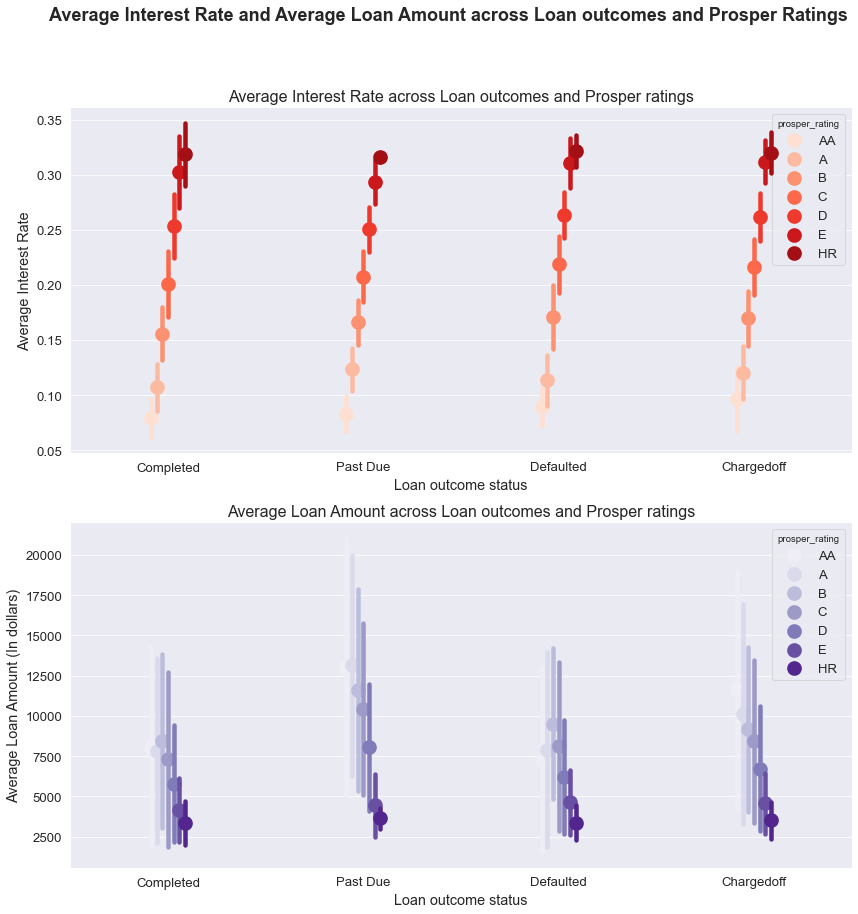

In [54]:
plt.figure(figsize=(14,14))
plt.suptitle('Average Interest Rate and Average Loan Amount across Loan outcomes and Prosper Ratings', fontsize=18, fontweight='bold')

plt.subplot(2,1,1)
plt.title('Average Interest Rate across Loan outcomes and Prosper ratings', fontsize=16)
sns.pointplot(data=loan_df, x='loan_status', y='borrower_rate',
              hue='prosper_rating',hue_order=['AA','A','B','C','D','E','HR'],
              palette='Reds', dodge=True, ci='sd', linestyles="")
plt.xlabel('Loan outcome status')
plt.ylabel('Average Interest Rate')

plt.subplot(2,1,2)
plt.title('Average Loan Amount across Loan outcomes and Prosper ratings', fontsize=16)
sns.pointplot(data=loan_df, x='loan_status', y='loan_original_amount',
              hue='prosper_rating', hue_order=['AA','A','B','C','D','E','HR'],
              palette='Purples', dodge=True, ci='sd', linestyles="")
plt.xlabel('Loan outcome status')
plt.ylabel('Average Loan Amount (In dollars)');

- From the first chart with the average interest rate on the y-axis against loan outcomes on the x-axis, we can see that through out different loan outcomes, Higher average interest rates are associated with higher risk ratings.


- In the second chart with average loan amounts on the y-axis against loan outcomes on the x-axis, we can see that through out different loan outcomes, lower average loan amounts are more associated with higher risk ratings but there is much variance in lower risk ratings than in higher risk ratings in the four outcomes. This might be confusing and counterintuitive, but can be understood in the lights of our previous explorations of the different interactions between multiple values. 

**A look at the distribution of interest rates and loan amounts across different loan outcomes.**

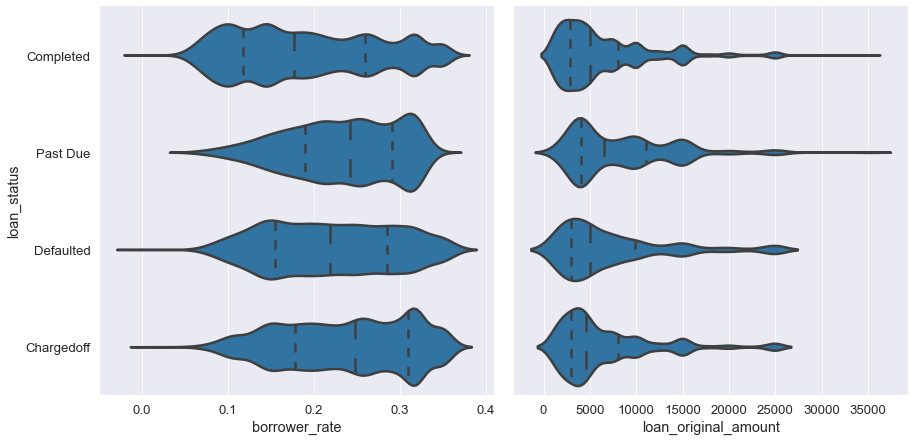

In [55]:
g = sns.PairGrid(data = loan_df, x_vars = ['borrower_rate', 'loan_original_amount'],
                y_vars = ['loan_status'], height=6)
g.map(sns.violinplot, inner = 'quartile');

- In the violinplot above with `borrower_rate` (interest rate) on the x-axis against `loan_status` on the y-axis, the difference between completed and non-completed loans is much clear and prominent. The bulk of the points in completed loans is found at lower interest rate, this is visible in the plot. Also completed loan tend to have lower median interest rate than non-completed loans.


- In the violinplot above with `loan_original_amount`on the x-axis against `loan_status` on the y-axis, we can see a difference (although not as clear as in the case of interest rate) in the median and distribution of points of completed and not completed loans.

<a id='resources'></a>
# <font color='#6495ED'> Resources
    
- [Wikipedia article about Prosper](https://en.wikipedia.org/wiki/Prosper_Marketplace)
- [Replacing multiple values in pandas](https://stackoverflow.com/questions/22100130/pandas-replace-multiple-values-one-column)
- [What to consider when creating pie charts](https://academy.datawrapper.de/article/127-what-to-consider-when-creating-a-pie-chart)
- [Correlation betweem two columns in pandas](https://stackoverflow.com/questions/42579908/use-corr-to-get-the-correlation-between-two-columns?noredirect=1&lq=1)
- [Seaborn PairGrid documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)
- [Matplotlib hexbin documentation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hexbin.html)
- [seaborn regplot documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html)